In [1]:
import numpy as np
import matplotlib.pyplot as plt
import core_func as cf

# Implementing dimensionless units

This section is focused on indentifying the natural units and converting the parameters to dimensionless units 

The natural units used in the equations are:
- The frequency factor $\nu$ which represents the frequency at which collisions occur.
- The Boltzmann constant $k_{B}$.
- The energy required to break the bond with one neighbor $\varphi$.
- The layer spacing $d$.

In the paper they have already used dimensionless units. These are
- $L/k_{B}T$ for the temperature,
- $\Delta \mu/k_{B}T$ for the chemical potential,
- $R/k^{+}d$ for the growth rate,
- $\gamma/k_{B}T$ for the extra free energy after the formation of a clusterof $n$ atoms on a (001) surface,
- $c/k^{+}d$ for the velocity of the monoatomic step.

The parameter $L$ is the binding energy of the simple cubic lattice, where $L = \varphi 3$.\
We will continue to use these dimensionless units as this allows for easy comparison between our results and the results from the paper.

For the simulation the impingement, evaporation and surface migration rate are used to determine if an atom will interact with the lattice. These rates have been defined as
\begin{equation}
    \begin{split}
        k^{+} &= \mathrm{exp}\left(\Delta \mu / k_{B} T \right) k_{3}^{-},\\
        k_{n}^{-} &= \nu \, \mathrm{exp}\left(- n \varphi / k_{B} T \right),\\
        k_{nm} &= \frac{1}{8} \nu \, \mathrm{exp}\left\{- \left[ E_{\mathrm{sd}} (n,m) + \Delta E (n,m) \right] / k_{B} T \right\},
    \end{split}
\end{equation}
respectively.

In the equation of the migration rate $k_{nm}$ two energy terms are present. These are the activation energy $E_{sd}$ which determines the mobility of the adatoms, and $\Delta E$ (name unknown).\
The activation energy $E_{sd}$ is specified as
\begin{equation}
    E_\mathrm{sd} (n,m) = \begin{cases} \varphi/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 \varphi / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 \varphi /2, & \mbox{if } n \mbox{ and } m>2, \end{cases},
\end{equation}
and $\Delta E$ is specified as
\begin{equation}
    \Delta E (n,m) = \begin{cases} (n-m)\varphi & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}.
\end{equation}

When looking at the equations we can determine the last dimensionless units used in our simulation, these are for the impingement, evaporation and surface migration rate (represented in the equation as $k$)
\begin{equation}
    \tilde{k} = k/\nu,
\end{equation}
and for the energies
\begin{equation}
    \tilde{E} = E/\varphi.
\end{equation}

To simplify the dimensionless units from the paper we will denote them as
\begin{equation}
    \tilde{L} = L/k_{B}T , \qquad  \Delta\tilde{\mu} = \Delta\mu/k_{B}T , \qquad  \tilde{R} = R/k^{+}d , \qquad  \tilde{\gamma} = \gamma/k_{B}T , \qquad \tilde{c} = c/k^{+}d , \qquad  \tilde{T} = \varphi/k_{B}T.
\end{equation}
The expression for $\tilde{T}$ is included because the parameter $L$ never returns in any of the equations. To prevent from introducing $\tilde{L}/3$ in many equation $\tilde{T}$ will be used instead.

-----------------------------

The dimensionless impingement, evaporation and surface migration rate will then become
\begin{equation}
    \begin{split}
        \tilde{k}^{+} &= \mathrm{exp}(\Delta\tilde{\mu})\tilde{k}_{3}^{-},\\
        \tilde{k}_{n}^{-} &= \mathrm{exp}(-n\tilde{T}),\\
        \tilde{k}_{nm} &= \frac{1}{8} \mathrm{exp}\{- [ \tilde{E}_{\mathrm{sd}} (n,m) + \Delta \tilde{E} (n,m) ] \tilde{T}\}.
    \end{split}
\end{equation}
\
The dimensionless energies will become
\begin{equation}
    \begin{split}
        \tilde{E}_\mathrm{sd} (n,m) &= \begin{cases} 1/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 /2, & \mbox{if } n \mbox{ and } m>2, \end{cases}\\
        \\
        \Delta \tilde{E} (n,m) &= \begin{cases} n-m & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}
    \end{split}
\end{equation}

# Nucleation and critical clusters

Quote from paper:

-----------------------------------------
$\textit{"In the absence of nucleation, the probability of finding a cluster of $n$ atoms on a paticular site is}$
\begin{equation}
    p_n \cong \mathrm{exp}(- G_{n}/k_{B}T),
\end{equation}
$\textit{where}$
\begin{equation}
    G_n \cong 4 \gamma \sqrt{n} - n \Delta \mu,
\end{equation}
$\textit{is the extra free energy after the formation of a cluster of n atoms on a}$ (001) $\textit{surface.}$\
$\textit{The rate of formation of 2D nuclei at a site is}$
\begin{equation}
    J = Z \Gamma_{n^{*}} p_{n^{*}}.
\end{equation}
$\textit{Here $n^{*}$ represents the number of atoms in a critical cluster, and it is the value of $n$ which yields the maximum $G_{n}$.}$ $\textit{$\Gamma_{n^{*}}$ is the rate of addition of atoms to a critical cluster, $Z$ is the Zeldovich non-equilibrium factor which accounts for a}$ $\textit{reduction in the number of clusters during stead-state nucleation."}$

-----------------------------------------
Therefore, the value of $n^{*}$ is determined by
\begin{equation}
    \left.\frac{d G_n}{dn}\right\vert_{n^{*}} = \frac{2 \gamma}{\sqrt{n^{*}}} - \Delta \mu = 0
\end{equation}
The number of atoms in a critical cluster is therefore $n^{*} = 4(\gamma/\Delta \mu)^2 = 4(\tilde{\gamma}/\Delta \tilde{\mu})^2$.\
\
This result is consistent with figure 2 from the paper. It shows that for larger values of $\Delta \mu$ the growthrate $R/k^{+}d$ increases. The result from the equation shows that for larger values of $\Delta \mu$ the number of atoms in a critical cluster $n^{*}$ decreases. This is consisten with figure 2 because smaller values for $n^{*}$ indicate that smaller clusters will be sustainable (and grow).\
\
The value of $\gamma$ at temperatures higher than $0.92 T_{R}$ is $\gamma = 0$. At temperatures less than $0.8 T_{R}$
\begin{equation}
    \begin{split}
        \gamma/k_{B} T &= \varphi / 2 k_{B} T - \mathrm{ln}[\mathrm{coth}(\varphi/ 4 k_{B} T)]\\
        \tilde{\gamma} &= \tilde{T}/2 - \mathrm{ln}[\mathrm{coth}(\tilde{T}/4)]
    \end{split}
\end{equation}
In literature, the roughening temperature $T_R$ has been determined to be $L/k_{B}T_R = 4.9$. The parameter $L$ is the binding energy of the simple cubic lattice, where $L = \varphi 3$.

# 2D nucleation vs spiral growth

The rate of formation on a perfect (001) surface is
\begin{equation}
    J = k^{+} (\Delta \mu / k_{B} T)^{1/2} \mathrm{exp}[-4 \gamma^2 / (k_{B} T \Delta \mu)].
\end{equation}
For values of $\Delta \mu$ in the range: $0 \leq \Delta \mu \leq \gamma^2/k_{B} T$, the exponential is very small. This is therefore the range where screw dislocations are imporatant.\
\
The rate of formation due to dislocation is
\begin{equation}
    I = bc \Delta \mu /(19 \gamma a),
\end{equation}
with $b$ the magnitude of the Burgers vector and $c$ the step velocity.\
\
The time $\tau$ to grow one layer of the crystal is retated to $J$ and $I$ as
\begin{equation}
    \frac{1}{3}\pi J \rho c^2 \tau^3 + I \tau = 1.
\end{equation}
Defining $Q \equiv (\frac{1}{3} \pi J \rho c^2)^{1/3}$, we can rewrite the previous equation as
\begin{equation}
    (Q \tau)^{3} + (I \tau) = 1,
\end{equation}
which gives in the limits
\begin{equation}
    \tau^{-1} \cong \begin{cases} Q + I/3, & \mbox{if } I \ll Q \\ I [1 + (Q/I)^3], & \mbox{if } I \gg Q \end{cases}
\end{equation}

The goal is to use the Monte Carlo simulation to simulate the growth rate of a crystal at different temperatures and different chemical potentials for both a perfect cystal suface and spiral growth due to dislocation. Therefore, we need to determine what the conditions (i.e. temperature and chemical potential) are where the "boundary" between growth dominated due to 2D nucleation and spiral growth is.\
The spiral growth regime will be limited to the values of $\Delta \mu$ where $Q \leq I/3$. The growth due to 2D nucleation in this regime will be less than 4\%. The boundary will therefore obey
\begin{equation}
    \begin{split}
        \frac{\Delta \mu_0}{k_{B} T} &= \frac{-1.333 (\gamma / k_{B} T)^{2}}{\mathrm{ln}[0.0168 (c/ k^{+} a)^{1/3} (\Delta \mu_0 / k_{B} T)^{5/6} (k_{B} T / \gamma) b]},\\
        \\
            \Delta \tilde{\mu}_0 &= \frac{-1.333 \tilde{\gamma}^2}{\mathrm{ln}(0.0168\, \tilde{c}^{1/3} \, \Delta \tilde{\mu}_0^{5/6} \, \tilde{\gamma}^{-1} \,b)},
    \end{split}
\end{equation}
where $a$ is the modulus of the lattice constant and $b$ is the magnitude of the Burgers vector.\
\
The parameter $c$ is the step velocity. At low temperatures the step velocity is
\begin{equation}
    \begin{split}
        c &= k^{+} a [1 - \mathrm{exp}(- \Delta \mu / k_{B} T)],\\
        \tilde{c} &= c/k^{+}a = [1 - \mathrm{exp}(- \Delta \tilde{\mu})].
    \end{split}
\end{equation}
However, because $c$ is in the argurment of the logarithm of the equation for $\Delta \tilde{\mu}_{0}$ this expression of $c$ can also be used to determine the boundary between the different growth regions. The magnitude of the lattice vector $a$ is set to unity.

As $\Delta \tilde{\mu}_0$ is at both side of the equation for the growth boundary, the value of $\Delta \tilde{\mu}_0$ has to be solved by iteration.

----------------------------

# Growth boundary

This section is focused on determining the growth boundary between growth due to 2D nucleation and spiral growth.

Determine $\Delta \tilde{\mu}_0$ through iteration.
\begin{equation}
    \Delta \tilde{\mu}_0 = \frac{-1.333 \tilde{\gamma}^2}{\mathrm{ln}(0.0168\, \tilde{c}^{1/3} \, \Delta \tilde{\mu}_0^{5/6} \, \tilde{\gamma}^{-1} \,b)},
\end{equation}
with
\begin{equation}
    \tilde{c} = [1 - \mathrm{exp}(- \Delta \tilde{\mu})] \quad \mbox{and}
\end{equation}
\
\begin{equation}
    \begin{split}
        \tilde{\gamma} &= \tilde{T}/2 - \mathrm{ln}[\mathrm{coth}(\tilde{T}/4)],\\
         &= \tilde{T}/2 + \mathrm{ln}[\mathrm{tanh}(\tilde{T}/4)].
    \end{split}
\end{equation}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def growth_func(mu, T, b):
    gamma = 1/2 * T + np.log(np.tanh(1/4*T))
    c = 1 - np.exp(-mu)
    new_mu = (-1.333 * gamma**2) / np.log(0.0168 * c**(1/3) * mu**(5/6) * 1/gamma * b)
    return new_mu

def growth_bound(mu, T, b):
    d_mu = 1e-4
    mu_0 = np.array([])
    for T_i in T:
        mu_i = growth_func(mu, T_i, b)
        error = ((mu - mu_i)/ mu)**2
        while error > d_mu:
            mu_j = growth_func(mu_i, T_i, b)
            error = ((mu_j - mu_i)/ mu_i)**2
            mu_i = mu_j
        mu_0 = np.append([mu_0], [mu_i])
        #mu = mu_i
    return mu_0

In [3]:
b = 2
init_mu = 1
L = np.arange(5.4, 30, 0.05, dtype=float)
T = 1/3 * L
mu_0 = growth_bound(init_mu, T, b)

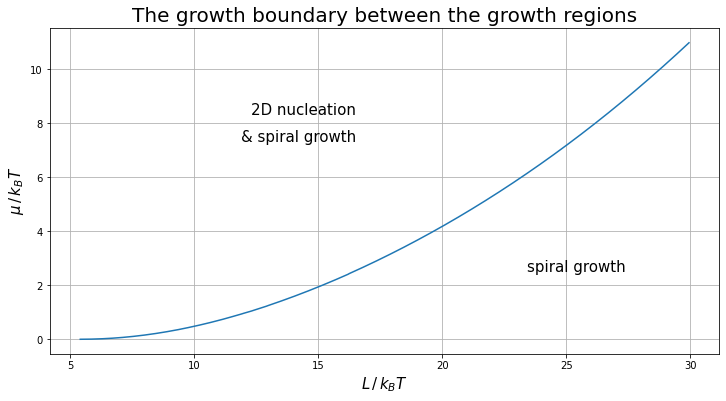

In [4]:
fig, ax = plt.subplots()
ax.plot(L, mu_0)
ax.set_xlabel(r'$L\,/\, k_{B} T$', fontsize=15)
ax.set_ylabel(r'$\mu\,/\, k_{B} T$', fontsize=15)
ax.set_title('The growth boundary between the growth regions', fontsize=20)
ax.text(12.3, 8.3, '2D nucleation', fontsize=15)
ax.text(11.9, 7.3, '& spiral growth', fontsize=15)
ax.text(23.4, 2.5, 'spiral growth', fontsize=15)
ax.grid()
fig.set_size_inches(12, 6)
#plt.savefig('Growth_boundary_between_the_growth_regions.png')
plt.show()

## Analyzing the behaviour of $\gamma$

According to literature the value of $\gamma$ is
\begin{equation}
    \gamma/k_{B}T = \begin{cases} \varphi/2k_{B}T - \mathrm{ln}[\mathrm{coth}(\varphi/4k_{B}T)], & \mbox{if } T < 0.8 T_R \\ 0, & \mbox{if } T \geq 0.92 T_R, \end{cases}
\end{equation}
with $L/k_{B}T_{R} \cong 4.9$. Converting the boundaries to dimensionless units gives us
\begin{equation}
    \begin{split}
        T < 0.8 T_R \qquad &\longrightarrow \qquad L/k_{B}T > 6.125,\\
        T \geq 0.92 T_R \qquad &\longrightarrow \qquad L/k_{B}T \leq 5.326.
    \end{split}
\end{equation}

This subsection is to analyze the behaviour of $\gamma$ near this point.

In [5]:
L = np.arange(4.5, 6.1, 0.01, dtype=float)
T = L/3
gamma_T = 1/2 * T + np.log(np.tanh(1/4*T))
gamma_0 = np.zeros(len(L))

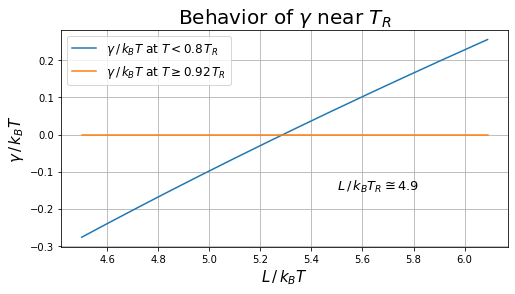

In [6]:
fig, ax = plt.subplots()
ax.plot(L, gamma_T, label=r'$\gamma\,/\, k_{B} T$ at $T<0.8 \, T_{R}$')
ax.plot(L, gamma_0, label=r'$\gamma\,/\, k_{B} T$ at $T \geq 0.92 \, T_{R}$')
ax.set_xlabel(r'$L\,/\, k_{B} T$', fontsize=15)
ax.set_ylabel(r'$\gamma\,/\, k_{B} T$', fontsize=15)
ax.set_title(r'Behavior of $\gamma$ near $T_{R}$', fontsize=20)
ax.legend(loc='best', fontsize='large')
ax.text(5.5, -0.15, r'$L\,/\,k_{B}T_{R} \cong 4.9$', fontsize=13)
ax.grid()
fig.set_size_inches(8, 4)
plt.show()

# Growth rate

The growth rate resulting from the spiral mechanism alone is
\begin{equation}
    \frac{R}{k^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \mu /k_{B}T)]}{\varphi / 2 k_{B} T - \ln[\coth(\varphi / 4 k_{b} T)]}.
\end{equation}
Here $b$ represents the magnitude of the Burgers vector of the dislocation pair in units of the layer spacing, and $d$ is the layer spacing.\
\
$\textbf{After deriving this expression myself, I discovered that this expression for the spiral growth rate is probably wrong.}$ $\textbf{When looking at the equation at first glance, you can see that the dimensions do not match.}$ $\textbf{The numirator has a chemical potential which units do not cancel out.}$\
\
I think the expression of the growth rate for the spiral growth should be
\begin{equation}
    \begin{split}
        \frac{R}{k^{+}d} &= \frac{0.053 b (\Delta \mu / k_{B}T) [1 - \mathrm{exp} (-\Delta \mu /k_{B}T)]}{\varphi / 2 k_{B} T - \ln[\coth(\varphi / 4 k_{b} T)]},\\
        \\
        \tilde{R} &= \frac{0.053 b \Delta \tilde{\mu} [1 - \mathrm{exp} (-\Delta \tilde{\mu})]}{\tilde{T}/2 - \ln[\coth(\tilde{T}/4)]}.
    \end{split}
\end{equation}

-----------------------------------

The growth rate of a perfect crystal is (i.e. 2D nucleation)
\begin{equation}
    \begin{split}
        \frac{R}{k^{+}d} &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right),\\
        \\
        &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left[- \frac{4}{3} \left( \frac{\gamma}{k_{B} T} \right)^2 \frac{k_{B} T}{\Delta \mu} \right],\\
        \\
        \tilde{R} &= \left( \frac{\pi}{3} \right)^{1/3} \Delta \tilde{\mu}^{1/6} [ 1 - \mathrm{exp}(- \Delta \tilde{\mu})]^{2/3} \mathrm{exp} \left[- \frac{4}{3} \left( \frac{\tilde{\gamma}}{\Delta \tilde{\mu}} \right) \right].
    \end{split}
\end{equation}
According to literature the value of $\gamma$ is dependent on the temperature as
\begin{equation}
    \gamma/k_{B}T = \begin{cases} \varphi/2k_{B}T - \mathrm{ln}[\mathrm{coth}(\varphi/4k_{B}T)], & \mbox{if } L/k_{B}T > 6.125, \\ 0, & \mbox{if } L/k_{B}T \leq 5.326, \end{cases}
\end{equation}
with $L/k_{B}T_{R} \cong 4.9$. 

## Growth rate 2D nucleation code

\begin{equation}
    \tilde{R} = (\pi/3)^{1/3} \Delta \tilde{\mu}^{1/6} [ 1 - \mathrm{exp}(- \Delta \tilde{\mu})]^{2/3} \mathrm{exp} [- 4 \tilde{\gamma}/3\Delta \tilde{\mu}]
\end{equation}

In [7]:
def nucleation_2D(mu, T):
    L_low = 5.326
    L_high = 6.125
    T_low = L_low/3
    T_high = L_high/3
    R = np.zeros(len(mu))
    mu_plot = mu
    for T_i in T:
        if T_i  <= T_low:
            gamma = 0
        elif T_i > T_high:
            gamma = 1/2*T_i + np.log(np.tanh(1/4*T_i))
        else:
            raise ValueError('Value for T is outside exeptible boundary. T must be in the domain T < {} and {} < T'.format(str(np.round(T_low, decimals=3)), str(np.round(T_high, decimals=3))))
        R_i = (np.pi/3)**(1/3) * mu**(1/6) * (1 - np.exp(-mu))**(2/3) * np.exp(-4/3 * gamma**2 /mu)
        R = np.vstack((R, R_i))
        mu_plot = np.vstack((mu_plot, mu))
    return R[1:,:], mu_plot[1:,:]

In [8]:
L = np.array([4.5, 9, 12])
mu = np.arange(0.01, 4, 0.01, dtype=float)

T = L/3

R, mu_plot = nucleation_2D(mu, T)

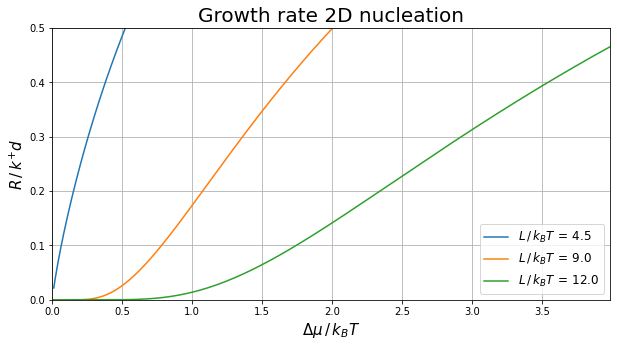

In [9]:
plt.figure(figsize=(10,5))
for i in range(len(L)):
    plt.plot(mu_plot[i,:], R[i,:], label=r'$L\,/\, k_B T \,=\,${}'.format(str(L[i])))
plt.xlabel(r'$\Delta\mu\,/\,k_{B}T$', fontsize=15)
plt.ylabel(r'$R\,/\,k^{+}d$', fontsize=15)
plt.title('Growth rate 2D nucleation', fontsize=20)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.xlim(0, np.max(mu))
plt.ylim(0, 0.5)
#plt.savefig('Growth_rate_2D_nucleation_v1')
plt.show()

$\textbf{The growth rate is too large, somewhere there is probably a factor in the wrong place or something}$

\begin{equation}
    \begin{split}
        \frac{R}{k^{+}d} &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right)\\
        \\
        &= \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left[ \frac{- 4}{3} \left( \frac{\gamma}{k_{B} T} \right)^2 \frac{k_{B} T}{\Delta \mu} \right]
    \end{split}
\end{equation}

## Growth rate spiral growth

The analytic spiral growth rate is only accurate at $L/k_{B}T>6.125$, otherwise $\gamma$ (the extra free energy of an atom at the edge of a cluster) becomes negative and therefore the growth rate becomes negative.\
\
\begin{equation}
    \tilde{R} = \frac{0.053 b \Delta \tilde{\mu} [1 - \mathrm{exp} (-\Delta \tilde{\mu})]}{\tilde{T}/2 - \ln[\coth(\tilde{T}/4)]}
\end{equation}

In [10]:
def spiral_growth(mu, T, b):
    L_high = 6.125
    T_high = L_high/3
    R = np.zeros(len(mu))
    mu_plot = mu
    for T_i in T:
        if T_i <= T_high:
            raise ValueError('Value for T is outside exeptible boundary. T must be in the domain T < {} and {} < T'.format(str(np.round(T_low, decimals=3)), str(np.round(T_high, decimals=3))))
        else:
            R_i = (0.053 * b * mu * (1 - np.exp(-mu))) / (1/2*T_i - np.log(np.tanh(1/4*T_i)))
        R = np.vstack((R, R_i))
        mu_plot = np.vstack((mu_plot, mu))
    return R[1:,:], mu_plot[1:,:]

In [11]:
b = 2
L = np.array([9, 12, 20])
mu = np.arange(0.01, 4, 0.01, dtype=float)

T = L/3

R_s, mu_plot = spiral_growth(mu, T, b)

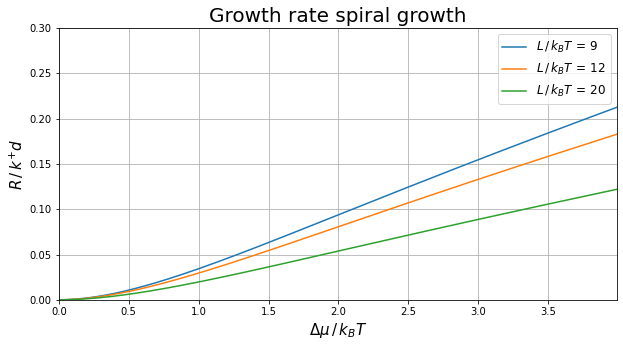

In [12]:
plt.figure(figsize=(10,5))
for i in range(len(L)):
    plt.plot(mu_plot[i,:], R_s[i,:], label=r'$L\,/\, k_B T \,=\,${}'.format(str(L[i])))
plt.xlabel(r'$\Delta\mu\,/\,k_{B}T$', fontsize=15)
plt.ylabel(r'$R\,/\,k^{+}d$', fontsize=15)
plt.title('Growth rate spiral growth', fontsize=20)
plt.legend(loc='best', fontsize='large')
plt.grid()
plt.xlim(0, np.max(mu))
plt.ylim(0, 0.3)
#plt.savefig('Growth_rate_spiral_growth_v1')
plt.show()

# Simulating Dislocation

The dislocation on a $(001)$ surface is simulated in the calculation of the closest neighbour.

The square represents the top view of the crystal surface, and the matrix representing the crystal surface. The coordinate of a surface point in the matrix is defined as $(i, j)$, which means that the surface point $(0, 0)$ is in the top left corner and $(0,1)$ the top right corner. The dislocation in this example lies in the $(010)$ plane and goes from the botom to the center of the matrix.\
The sign of the magnitude of the Burgers vector determines wether a step will go up or down. dislocation_neighbours scans the surface matrix and compairs it with the matrices from dislocation matrices. In the left image this would be scanning from left to right and from up to down. If the sign of $b$ is positive it will encounter an dislocation that is a step up and if the sign is negative is would be a step down. The value for $b$ can also be set to 0, this would mean that there is no dislocation.


            
      Crystal surface with dislocation                    Bottom side view of the dislocation

      --------------------------------                    for b>0
     |                                |                   
     |                                |                                        --------------
     |                                |                                       |
     |                                |                                       |
     |                                |                         --------------
     |                                |                   
     |                    _   _   _   |                   
     |                |               |   [start]         for b<0
     |                |               |                   
     |                |               |                         --------------
     |                |               |                                       |
     |                |               |                                       |
     |                |               |                                        --------------
     |                |               |                   
      --------------------------------    [end]           
                  [face_loc]
           
           

In [13]:
def dislocation_matrices(dims, face, face_loc, boundaries, b):
    """Defining a single dislocation line on the (001) cystal surface.
    
    Parameter
    ---------
    dims : Tulple or nd.array
        Dimensions of the crystal surface
    face : int --> {0, 1}
        The plain the dislocation line is located in
        Value
        -----
        0 : dislocation line lies in the (100) plain
        1 : dislocation line lies in the (010) plain
    face_loc : int --> {1:dims[i]-1}
        The location of the plane the dislocation line lies in. For
        [face_loc] = n, the dislocation is between the (n-1)th and nth
        atom.
    boundaries : Tulple --> [start, end]
        The boundaries of the dislocation line with [start] < [end]
        Value
        -----
        start : {0:dims[i]-1}
        end : {1:dims[i]}
    b : int
        The magnitude of the Burgers vector
        If b=0, there is no dislocation
        If b>0, the step will go up
        If b<0, the step will go down
    
    Return
    ------
    forward_matrix : nd.array
        Matrix used to create dislocation when looking at the forward neighbour
    backward_matrix : nd.array
        Matrix used to create dislocation when looking at the backward neighbour
    """
    forward_matrix = np.zeros(dims)
    backward_matrix = np.zeros(dims)
    line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
    dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
    if face == 0:
        forward_matrix[face_loc, line] = dislocation_line
        backward_matrix[face_loc-1, line] = -dislocation_line
    elif face == 1:
        forward_matrix[line, face_loc] = dislocation_line
        backward_matrix[line, face_loc-1] = -dislocation_line
    else:
        raise ValueWarning('Value for [face] should be either 0 or 1')
    
    return forward_matrix, backward_matrix


def dislocation_neighbours(surface, face, forward_matrix, backward_matrix):
    """Identifying the number of neighbours of each surface atom using periodic boundary
    conditions for a surface with a single dislocation.
    
    Parameter
    ---------
    surface : nd.array
        An N x N matrix representing the surface of a crystal
    face : int --> {0, 1}
        The plain the dislocation line is located in
        Value
        -----
        0 : dislocation line lies in the (100) plain
        1 : dislocation line lies in the (010) plain
    forward_matrix : nd.array
        Matrix used to create dislocation when looking at the forward neighbour
    backward_matrix : nd.array
        Matrix used to create dislocation when looking at the backward neighbour
    
    Return
    ------
    neighbours : nd.array
        An N x N matrix representing the number of neighbouring spaces of location (i, j)
        of the crystal surface that are occupied by an atom
    """
    neighbours = np.ones(dims)
    forward_neighbour = surface + forward_matrix
    backward_neighbour = surface + backward_matrix
    
    if face == 0:
        for i in range(dims[0]):
            for j in range(dims[1]):
                if surface[i,j] <= forward_neighbour[int(i+1-dims[0]*np.floor((i+1)/dims[0])),j]:
                    neighbours[i,j] += 1
                if surface[i,j] <= surface[i,int(j+1-dims[1]*np.floor((j+1)/dims[1]))]:
                    neighbours[i,j] += 1
                if surface[i,j] <= backward_neighbour[int(i-1-dims[0]*np.floor((i-1)/dims[0])),j]:
                    neighbours[i,j] += 1
                if surface[i,j] <= surface[i,int(j-1-dims[1]*np.floor((j-1)/dims[1]))]:
                    neighbours[i,j] += 1
    elif face == 1:
        for i in range(dims[0]):
            for j in range(dims[1]):
                if surface[i,j] <= surface[int(i+1-dims[0]*np.floor((i+1)/dims[0])),j]:
                    neighbours[i,j] += 1
                if surface[i,j] <= forward_neighbour[i,int(j+1-dims[1]*np.floor((j+1)/dims[1]))]:
                    neighbours[i,j] += 1
                if surface[i,j] <= surface[int(i-1-dims[0]*np.floor((i-1)/dims[0])),j]:
                    neighbours[i,j] += 1
                if surface[i,j] <= backward_neighbour[i,int(j-1-dims[1]*np.floor((j-1)/dims[1]))]:
                    neighbours[i,j] += 1
    else:
        raise ValueWarning('Value for the face of the dislocation should be either 0 for (010) plane or 1 for the (100) plane')
    return neighbours

$\textbf{check if dislocation_matrix and dislocation_neighbours indead simulate a dislocation in the crystal surface}$

In [14]:
dims = [5, 5]
face = 0
face_loc = 2
boundaries = [0,3]
b = 2
surface = cf.init_crystal(dims)
print(surface)
f_matrix, b_matrix = dislocation_matrices(dims, face, face_loc, boundaries, b)
print(f_matrix)
print(b_matrix)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[ 0.  0.  0.  0.  0.]
 [-2. -2. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [15]:
neigh = dislocation_neighbours(surface, face, f_matrix, b_matrix)
print(neigh)

[[5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [4. 4. 4. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]]


# Fixing the function for the migration rate

Original function

In [16]:
def surface_migration_rate(n, m, T):
    """
    Parameter
    ---------
    n : int
        Number of neighbours of the selected atom
    m : int
        Number of neighbours of the neighbour of the selected particle
    T : float
        Dimensionless temperature

    Return
    ------
    k_nm : float
        Dimensionless migration rate
    """

    if n == 1 or m == 1:
        Esd = 1/2
    elif n == 2 or m == 2:
        Esd = 3/2
    else:
        Esd = 5/2

    if m <= n:
        DeltaE = n-m
    else:
        DeltaE = 0

    k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
    return k_nm

$\textbf{Quote from paper}$

--------------------------

$\textit{"In the case of surface migration, some flexibility is allowed in the choice of transition probabilities.}$ $\textit{In this work, a surface atom with n neighbors jumps to a site where it would have $m$ neighbors at the rate}$
\begin{equation}
    k_{nm} = \frac{1}{8} \nu \, \mathrm{exp}\left\{- \left[ E_{\mathrm{sd}} (n,m) + \Delta E (n,m) \right] / k_{B} T \right\}
\end{equation}
$\textit{"}$

--------------------------

The value of $m$ is the number of neighbours the atom will have if it will jump. Therefore the number of neighbours has to be determined when the atom has left its original position. The number of neighbours determined using the functions nearest_neighbours and dislocation_neighbours can therefore NOT be used.

In [17]:
def nm_migration_rate(loc_n, loc_m, surface, neighbours, T, face, forward_matrix,
                      backward_matrix):
    """The migration rate of an atom from a position of n neighbours to m neighbours.

    Parameter
    ---------
    loc_n : Tulple
        The location of the atom on the crystal surface in its original position
    loc_m : Tulple
        The location of the atom on the crystal surface in its new position
    surface : nd.array
        The surface of the crystal
    neighbours : nd.array
        The number of neighbouring spaces of location (i, j) of the crystal surface 
        that are occupied by an atom
    T : float
        Dimensionless temperature
    face : int --> {0, 1}
        The plain the dislocation line is located in
    forward_matrix : nd.array
        Matrix used to create dislocation when looking at the forward neighbour
    backward_matrix : nd.array
        Matrix used to create dislocation when looking at the backward neighbour

    Return
    ------
    k_nm : float
        Dimensionless migration rate
    """
    
    n = neighbours(loc)
    surface[loc_n] += -1
    surface[loc_m] += 1
    m = 1
    if face == 0:
        if surface[loc_m] <= forward_neighbour[int(loc_m[0]+1-dims[0]*np.floor((loc_m[0]+1)/dims[0])),loc_m[1]]:
            m += 1
        if surface[loc_m] <= surface[loc_m[0],int(loc_m[1]+1-dims[1]*np.floor((loc_m[1]+1)/dims[1]))]:
            m += 1
        if surface[loc_m] <= backward_neighbour[int(loc_m[0]-1-dims[0]*np.floor((loc_m[0]-1)/dims[0])),loc_m[1]]:
            m += 1
        if surface[loc_m] <= surface[loc_m[0],int(loc_m[1]-1-dims[1]*np.floor((loc_m[1]-1)/dims[1]))]:
            m += 1
    else:
        if surface[loc_m] <= surface[int(loc_m[0]+1-dims[0]*np.floor((loc_m[0]+1)/dims[0])),loc_m[1]]:
            m += 1
        if surface[loc_m] <= forward_neighbour[loc_m[0],int(loc_m[1]+1-dims[1]*np.floor((loc_m[1]+1)/dims[1]))]:
            m += 1
        if surface[loc_m] <= surface[int(loc_m[0]-1-dims[0]*np.floor((loc_m[0]-1)/dims[0])),loc_m[1]]:
            m += 1
        if surface[loc_m] <= backward_neighbour[loc_m[0],int(loc_m[1]-1-dims[1]*np.floor((loc_m[1]-1)/dims[1]))]:
            m += 1

    if n == 1 or m == 1:
        Esd = 1/2
    elif n == 2 or m == 2:
        Esd = 3/2
    else:
        Esd = 5/2

    if m <= n:
        DeltaE = n-m
    else:
        DeltaE = 0

    k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
    return k_nm

# Simulating spiral growth

## Analyse and change choos_subset

In [18]:
def dis_choose_subset(surface, T, mu, face, f_matrix, b_matrix):
    """choose the number of neighbours each atom in the subset will have in which interaction will occur
    
    Parameter
    ---------
    surface : nd.array
        An N x N matrix representing the surface of a crystal
    T : float
        Dimensionless temperature
    mu : float
        Dimensionless chemical potential

    Return
    ------
    subset : 

    """
    counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
    neigh = dislocation_neighbours(surface, face, f_matrix, b_matrix)
    unique, counting = np.unique(neigh, return_counts = True)
    index = 0
    for number in unique:
        counts[number] = counting[index]
        index += 1

    denom = 0
    for i in range(1,6):
        denom += counts[i]*(cf.evaporation_rate(i,T)+cf.impingement_rate(mu, T)+cf.surface_migration_rate(i,i,T))

    prob = np.zeros(5)
    for i in range(5):
        prob[i] = counts[i+1]*(cf.evaporation_rate(i+1,T)+cf.impingement_rate(mu, T)+cf.surface_migration_rate(i+1,i+1,T))/denom
    print(np.sum(prob))

    rand = uniform(0,1)
    if rand < prob[0]:
        subset = 1
    elif rand < prob[0] + prob[1]:
        subset = 2
    elif rand < prob[0] + prob[1] + prob[2]:
        subset = 3
    elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
        subset = 4
    elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
        subset = 5

    return subset

In [19]:
from random import uniform, choice
T = 10
mu = 6

dims = [5, 5]
face = 0
face_loc = 2
boundaries = [0,3]
b = 2
surface = cf.init_crystal(dims)
f_matrix, b_matrix = dislocation_matrices(dims, face, face_loc, boundaries, b)
subset = dis_choose_subset(surface, T, mu, face, f_matrix, b_matrix)
print(subset)

1.0
5


Sum of the probabilities is 1

In [20]:
dims = [5, 5]
face = 0
face_loc = 2
boundaries = [0,3]
b = 2
surface = cf.init_crystal(dims)
f_matrix, b_matrix = dislocation_matrices(dims, face, face_loc, boundaries, b)

counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
neigh = dislocation_neighbours(surface, face, f_matrix, b_matrix)
unique, counting = np.unique(neigh, return_counts = True)
index = 0
for number in unique:
    counts[number] = counting[index]
    index += 1

print(counts)

{1: 0, 2: 0, 3: 0, 4: 3, 5: 22}


In [21]:
neigh = np.array([[1,2,3,4,5],
                  [2,3,4,5,1],
                  [3,4,5,1,2],
                  [4,5,1,2,3],
                  [5,1,2,3,4]])

counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
unique, loc_2, counting = np.unique(neigh, return_inverse = True, return_counts = True)
index = 0
for number in unique:
    counts[number] = counting[index]
    index += 1

loc = np.where(neigh == 5)
x = loc[0]
y = loc[1]
print(counts)
print(loc_2)
print(neigh[x[3],y[3]])


{1: 5, 2: 5, 3: 5, 4: 5, 5: 5}
[0 1 2 3 4 1 2 3 4 0 2 3 4 0 1 3 4 0 1 2 4 0 1 2 3]
5


In [22]:
print(neigh[3])

[4 5 1 2 3]


-----------------------------------------

## Analyse and change interaction

### AAAAHHHHHH
To implement the function interations using the newly defined function for surface_migration_rate (which is called nm_migration_rate), subset should contain a subset of all the locations of of the atoms in that subset, or already have only one location.\
Sorry, I was on fire tonigh

In [23]:
def interaction(surface, T, mu, face, f_matrix, b_matrix):
    """randomly lets interaction take place in chosen subset"""

    dims = surface.shape
    neigh = dislocation_neighbours(surface, face, f_matrix, b_matrix)
    subset = choose_subset(surface, T, mu, face, f_matrix, b_matrix)
    options_x = np.where(neigh==subset)[0]
    options_y = np.where(neigh==subset)[1]
    site = choice(range(np.size(options_x)))

    location = (options_x[site], options_y[site])

    k_plus = impingement_rate(mu, T)
    k_minus = evaporation_rate(subset, T)
    k_nn = surface_migration_rate(subset, subset, T)

    denom = k_plus + k_minus + k_nn

    rand = uniform(0,1)
    if rand < k_plus/denom:
        surface[location] += 1
    elif rand < (k_plus+k_minus)/denom:
        surface[location] -= 1
    else:
        migrate = choice([(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)])
        m = neigh[int(location[0]+migrate[0]-dims[0]*np.floor((location[0]+migrate[0])/dims[0])),
                  int(location[1]+migrate[1]-dims[1]*np.floor((location[1]+migrate[1])/dims[1]))]
        n = neigh[location]
        prob = surface_migration_rate(n, m, T)
        rand = uniform(0,1)
        if rand < prob:
            surface[location] -= 1
            surface[int(location[0]+migrate[0]-dims[0]*np.floor((location[0]+migrate[0])/dims[0])),
                  int(location[1]+migrate[1]-dims[1]*np.floor((location[1]+migrate[1])/dims[1]))] += 1


    return surface

# Class for spiral growth

In [24]:
class crystal():
    """The growth of a crystal with dislocations.
    
    Parameter
    ---------
    
    """
    def __init__(self, dims, mu, T):
        self.T = T
        self.mu = mu
        self.dims = dims
        self.fx_matrix = np.zeros(dims)
        self.bx_matrix = np.zeros(dims)
        self.fy_matrix = np.zeros(dims)
        self.by_matrix = np.zeros(dims)
        self.num_dislocations = 0
        self.time = 0
        self.surface = np.ones(self.dims)
        self.surface = self.surface[:,:,np.newaxis]
        #self.neigh = np.array([])
    
    def dislocation_matrices(self, face, face_loc, boundaries, b):
        """Defining a  dislocation line on the (001) cystal surface."""
        
        line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
        dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
        f_matrix = np.zeros(self.dims)
        b_matrix = np.zeros(self.dims)
        if face == 0:
            f_matrix[face_loc, line] = dislocation_line
            b_matrix[face_loc-1, line] = -dislocation_line
            self.fx_matrix += f_matrix
            self.bx_matrix += b_matrix
        elif face == 1:
            f_matrix[line, face_loc] = dislocation_line
            b_matrix[line, face_loc-1] = -dislocation_line
            self.fy_matrix += f_matrix
            self.by_matrix += b_matrix
        else:
            raise ValueWarning('Value for [face] should be either 0 or 1')
        self.num_dislocations += 1
        print('crystal surface with {} dislocations'.format(str(self.num_dislocations)))
    
    def num_dislocations(self):
        print('There are {} dislocations'.format(str(self.num_dislocations)))
    
    def scan_neighbours(self, surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc):
        """Scanning how many neighbours an atom on the surface has."""
        
        dims = self.dims
        n = 1
        if surface[loc] <= fx_neigh[(loc[0]+1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= fy_neigh[loc[0] % dims[0], (loc[1]+1) % dims[1]]:
            n += 1
        if surface[loc] <= bx_neigh[(loc[0]-1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= by_neigh[loc[0] % dims[0], (loc[1]-1) % dims[1]]:
            n += 1
        return n
    
    def neighbours(self):
        """Identifying the number of neighbours of each surface atom using periodic boundary
        conditions for a surface with a single dislocation."""
        
        dims = self.dims
        neigh = np.zeros(dims)
        surface = self.surface[:,:,self.time]
        fx_neigh = surface + self.fx_matrix
        bx_neigh = surface + self.bx_matrix
        fy_neigh = surface + self.fy_matrix
        by_neigh = surface + self.by_matrix
        for i in range(dims[0]):
            for j in range(dims[1]):
                loc = (i,j)
                n = self.scan_neighbours(surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc)
                neigh[i,j] = n
        return neigh
    
    def evaporation_rate(self, n):
        """The evaporation rate based on the number of neighbours and temperature."""
        
        k_minus = np.exp(-n*self.T)
        return k_minus
    
    def impingement_rate(self):
        """The impingement rate based on the chemical potential and temperature."""
        
        k_3 = self.evaporation_rate(3)
        k_plus = np.exp(self.mu)*k_3
        return k_plus
    
    def nn_migration_rate(self, n):
        if n == 1:
            Esd = 1/2
        elif n == 2:
            Esd = 3/2
        else:
            Esd = 5/2
        k_nn = 1/8*np.exp(-Esd*self.T)
        return k_nn
    
    def nm_migration_rate(self, loc_n, loc_m, neigh):
        n = neigh[loc_n]
        new_surface = self.surface[:,:,self.time]
        new_surface[loc_n] += -1
        new_surface[loc_m] += 1
        fx_neighbour = new_surface + self.fx_matrix
        fy_neighbour = new_surface + self.fy_matrix
        bx_neighbour = new_surface + self.bx_matrix
        by_neighbour = new_surface + self.by_matrix
        m = self.scan_neighbours(new_surface, fx_neighbour, fy_neighbour, bx_neighbour, by_neighbour, loc_m)
        
        if n == 1 or m == 1:
            Esd = 1/2
        elif n == 2 or m == 2:
            Esd = 3/2
        else:
            Esd = 5/2

        if m <= n:
            DeltaE = n-m
        else:
            DeltaE = 0

        k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
        return k_nm
    
    
    def choose_subset(self):
        T = self.T
        mu = self.mu
        counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
        neigh = self.neighbours()
        unique, counting = np.unique(neigh, return_counts = True)
        #print('counts = {}'.format(str(counting)))
        #print('neighbours = ')
        #print('{}'.format(str(neigh)))
        index = 0
        impingement_rate = self.impingement_rate()
        
        for number in unique:
            counts[number] = counting[index]
            index += 1

        denom = 0
        for i in range(1,6):
            denom += counts[i] * (self.evaporation_rate(i) + impingement_rate
                                  + self.nn_migration_rate(i))

        prob = np.zeros(5)
        for i in range(5):
            prob[i] = counts[i+1] * (self.evaporation_rate(i+1) + impingement_rate
                                     + self.nn_migration_rate(i+1)) / denom
        #print('set probability = {}'.format(str(prob)))

        rand = uniform(0,1)
        if rand < prob[0]:
            subset = 1
        elif rand < prob[0] + prob[1]:
            subset = 2
        elif rand < prob[0] + prob[1] + prob[2]:
            subset = 3
        elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
            subset = 4
        elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
            subset = 5
        
        return subset, neigh
    
    def interaction(self):
        dims = self.dims
        surface = self.surface[:,:,self.time]
        change_surface = np.zeros(dims)
        subset, neigh = self.choose_subset()
        #!self.neigh[:,:,self.time] = np.append(self.neigh[:,:,self.time], neigh[:,:,np.newaxis], axis=2)
        options_x = np.where(neigh==subset)[0]
        options_y = np.where(neigh==subset)[1]
        site = choice(range(np.size(options_x)))

        location = (options_x[site], options_y[site])
        #print(location)

        k_plus = self.impingement_rate()
        k_minus = self.evaporation_rate(subset)
        k_nn = self.nn_migration_rate(subset)

        denom = k_plus + k_minus + k_nn
        #print('k_p = {}, k_m = {}'.format(str(k_plus/denom), str(k_minus/denom)))
        #print('k_p = {}, k_m = {}, k_nn = {}'.format(str(k_plus/denom), str(k_minus/denom), str(k_nn/denom)))
        #!change_neigh = np.zeros(dims)

        rand = uniform(0,1)
        #print('rand = {}'.format(str(rand)))
        if rand < k_plus/denom:
            change_surface[location] += 1
            #!loc = (location[0]-1,location[0]+1,location[1]-1,location[1]+1)
            #!change_neigh[loc[0]:loc[1],loc[2]:loc[3]] = 
            #print('impingement')
        elif rand < (k_plus+k_minus)/denom:
            change_surface[location] -= 1
            #print('evaporation')
        #else:
            #print('migration')
            #Should the choise for migration location depend on k_nm????????????????????????????
            #options = [(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)]
            #migrate = choice(options)
            #prob = self.nm_migration_rate(location, migrate, neigh)
            #rand = uniform(0,1)
            #if rand < prob:
            #    print('migration')
            #    print(k_nn/denom)
            #    change_surface[location] -= 1
            #    change_surface[int(location[0]+migrate[0]-dims[0]*np.floor((location[0]+migrate[0])/dims[0])),
            #          int(location[1]+migrate[1]-dims[1]*np.floor((location[1]+migrate[1])/dims[1]))] += 1
        new_surface = surface + change_surface
        self.surface = np.append(self.surface, new_surface[:,:,np.newaxis], axis=2)
        self.time += 1
        #print('----------------------------')
        #return new_surface

In [25]:
import numpy as np
dims = [5, 5]
mu = 4
T = 10
test = crystal(dims, mu, T)
print(test.fx_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [26]:
import numpy as np
dims = [5, 5]
mu = 4
T = 10

#dislocations
face_1 = 0
face_loc_1 = 2
boundaries_1 = [0, 3]
b_1 = 2

test = crystal(dims, mu, T)

test.dislocation_matrices(face_1, face_loc_1, boundaries_1, b_1)
neigh = test.neighbours()
print(neigh)

crystal surface with 1 dislocations
[[5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [4. 4. 4. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]]


In [27]:
import numpy as np
from random import uniform, choice
dims = [5, 5]
mu = 4
T = 10

#dislocations
face_1 = 0
face_loc_1 = 2
boundaries_1 = [0, 3]
b_1 = 2

test = crystal(dims, mu, T)

test.dislocation_matrices(face_1, face_loc_1, boundaries_1, b_1)
subset, neigh = test.choose_subset()
print(subset)
print(neigh)
print(np.where(neigh==subset))

crystal surface with 1 dislocations
5
[[5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]
 [4. 4. 4. 5. 5.]
 [5. 5. 5. 5. 5.]
 [5. 5. 5. 5. 5.]]
(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4],
      dtype=int64), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype=int64))


In [28]:
import numpy as np
from random import uniform, choice
dims = [5, 5]
mu = 4
T = 10

#dislocations
face_1 = 0
face_loc_1 = 2
boundaries_1 = [0, 3]
b_1 = 2

test = crystal(dims, mu, T)

test.dislocation_matrices(face_1, face_loc_1, boundaries_1, b_1)
new_surface = test.interaction()
print(test.surface[:,:,0])
print(new_surface[:,:])

crystal surface with 1 dislocations
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import numpy as np
from random import uniform, choice
dims = [20, 20]
mu = 1.5
T = 4

#dislocations
face_1 = 0
face_2 = 0
face_loc_1 = 10
face_loc_2 = 9
boundaries_1 = [0, 10]
boundaries_2 = [0, 10]
b_1 = 2
b_2 = 1

test = crystal(dims, mu, T)

test.dislocation_matrices(face_1, face_loc_1, boundaries_1, b_1)
test.dislocation_matrices(face_2, face_loc_2, boundaries_2, b_2)

crystal surface with 1 dislocations
crystal surface with 2 dislocations


In [ ]:
N = 10000
for i in range(N):
    test.interaction()

print(test.surface[:,:,-1])

[[1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 3. 3. 3. 3. 3. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [ ]:
print(test.time)

10000


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.        0.        0.        0.1203511 0.8796489]
(4, 3)
k_p = 0.9999251537724894, k_m = 7.484622751061124e-05
rand = 0.7191554393810596
impingement
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 1.]]


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.97788381 0.         0.         0.00277257 0.01934362]
(4, 3)
k_p = 0.0015011822567369915, k_m = 0.998498817743263
rand = 0.5092602179818377
evaporation
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.        0.        0.        0.1203511 0.8796489]
(3, 3)
k_p = 0.9999251537724894, k_m = 7.484622751061124e-05
rand = 0.2281240529457772
impingement
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 1.]
 [1. 1. 1. 1. 1.]]


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.97788381 0.         0.         0.00277257 0.01934362]
(3, 4)
k_p = 0.9999251537724894, k_m = 7.484622751061124e-05
rand = 0.03179824976393475
impingement
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1.]]


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.         0.63778769 0.         0.04738167 0.31483064]
(0, 2)
k_p = 0.9999251537724894, k_m = 7.484622751061124e-05
rand = 0.5042559912854216
impingement
[[1. 1. 2. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1.]]


In [ ]:
test.interaction()
print(test.surface[:,:,-1])

set probability = [0.94437888 0.03604182 0.         0.00267757 0.01690173]
(0, 2)
k_p = 0.0015011822567369915, k_m = 0.998498817743263
rand = 0.3932530962663714
evaporation
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 2. 2.]
 [1. 1. 1. 1. 1.]]


In [ ]:
print(test.fx_matrix)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 2. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
print(20 % 20)

0


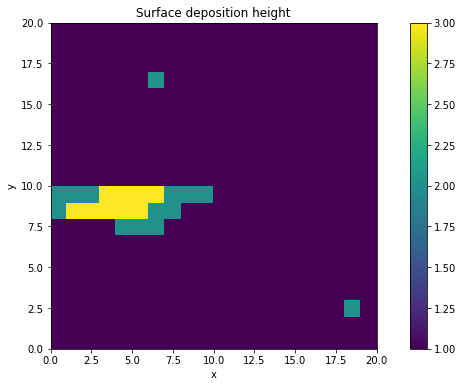

In [ ]:
import matplotlib.pyplot as plt
xr, yr = test.surface[:,:,-1].shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, test.surface[:,:,-50])
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()

# Improving scan

In [ ]:
class crystal():
    """The growth of a crystal with dislocations.
    
    Parameter
    ---------
    
    """
    def __init__(self, dims, mu, T):
        self.T = T
        self.mu = mu
        self.dims = dims
        self.fx_matrix = np.zeros(dims)
        self.bx_matrix = np.zeros(dims)
        self.fy_matrix = np.zeros(dims)
        self.by_matrix = np.zeros(dims)
        self.num_dislocations = 0
        self.time = 0
        self.surface = np.ones(self.dims)
        self.surface = self.surface[:,:,np.newaxis]
        self.neigh = np.array([])
    
    def dislocation_matrices(self, face, face_loc, boundaries, b):
        """Defining a  dislocation line on the (001) cystal surface."""
        
        line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
        dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
        f_matrix = np.zeros(self.dims)
        b_matrix = np.zeros(self.dims)
        if face == 0:
            f_matrix[face_loc, line] = dislocation_line
            b_matrix[face_loc-1, line] = -dislocation_line
            self.fx_matrix += f_matrix
            self.bx_matrix += b_matrix
        elif face == 1:
            f_matrix[line, face_loc] = dislocation_line
            b_matrix[line, face_loc-1] = -dislocation_line
            self.fy_matrix += f_matrix
            self.by_matrix += b_matrix
        else:
            raise ValueWarning('Value for [face] should be either 0 or 1')
        self.num_dislocations += 1
        print('crystal surface with {} dislocations'.format(str(self.num_dislocations)))
    
    def num_dislocations(self):
        print('There are {} dislocations'.format(str(self.num_dislocations)))
    
    def scan_neighbours(self, surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc):
        """Scanning how many neighbours an atom on the surface has."""
        
        dims = self.dims
        n = 1
        if surface[loc] <= fx_neigh[(loc[0]+1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= fy_neigh[loc[0] % dims[0], (loc[1]+1) % dims[1]]:
            n += 1
        if surface[loc] <= bx_neigh[(loc[0]-1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= by_neigh[loc[0] % dims[0], (loc[1]-1) % dims[1]]:
            n += 1
        return n
    
    def neighbours(self):
        """Identifying the number of neighbours of each surface atom using periodic boundary
        conditions for a surface with a single dislocation."""
        
        dims = self.dims
        neigh = np.zeros(dims)
        surface = self.surface[:,:,self.time]
        fx_neigh = surface + self.fx_matrix
        bx_neigh = surface + self.bx_matrix
        fy_neigh = surface + self.fy_matrix
        by_neigh = surface + self.by_matrix
        for i in range(dims[0]):
            for j in range(dims[1]):
                loc = (i,j)
                n = self.scan_neighbours(surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc)
                neigh[i,j] = n
        return neigh
    
    def evaporation_rate(self, n):
        """The evaporation rate based on the number of neighbours and temperature."""
        
        k_minus = np.exp(-n*self.T)
        return k_minus
    
    def impingement_rate(self):
        """The impingement rate based on the chemical potential and temperature."""
        
        k_3 = self.evaporation_rate(3)
        k_plus = np.exp(self.mu)*k_3
        return k_plus
    
    def nn_migration_rate(self, n):
        if n == 1:
            Esd = 1/2
        elif n == 2:
            Esd = 3/2
        else:
            Esd = 5/2
        k_nn = 1/8*np.exp(-Esd*self.T)
        return k_nn
    
    def nm_migration_rate(self, loc_n, loc_m, neigh):
        n = neigh[loc_n]
        new_surface = self.surface[:,:,self.time]
        new_surface[loc_n] += -1
        new_surface[loc_m] += 1
        fx_neighbour = new_surface + self.fx_matrix
        fy_neighbour = new_surface + self.fy_matrix
        bx_neighbour = new_surface + self.bx_matrix
        by_neighbour = new_surface + self.by_matrix
        m = self.scan_neighbours(new_surface, fx_neighbour, fy_neighbour, bx_neighbour, by_neighbour, loc_m)
        
        if n == 1 or m == 1:
            Esd = 1/2
        elif n == 2 or m == 2:
            Esd = 3/2
        else:
            Esd = 5/2

        if m <= n:
            DeltaE = n-m
        else:
            DeltaE = 0

        k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
        return k_nm
    
    def choose_subset(self):
        T = self.T
        mu = self.mu
        counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
        if self.time == 0:
            first_neigh = self.neighbours()
            self.neigh = first_neigh[:,:,np.newaxis]
        neigh = self.neigh[:,:,self.time]
        unique, counting = np.unique(neigh, return_counts = True)
        #print('counts = {}'.format(str(counting)))
        #print('neighbours = ')
        #print('{}'.format(str(neigh)))
        index = 0
        impingement_rate = self.impingement_rate()
        
        for number in unique:
            counts[number] = counting[index]
            index += 1

        denom = 0
        for i in range(1,6):
            denom += counts[i] * (self.evaporation_rate(i) + impingement_rate)
                                  #+ self.nn_migration_rate(i))

        prob = np.zeros(5)
        for i in range(5):
            prob[i] = counts[i+1] * (self.evaporation_rate(i+1) + impingement_rate)/denom
                                     #+ self.nn_migration_rate(i+1)) / denom
        #print('set probability = {}'.format(str(prob)))

        rand = uniform(0,1)
        if rand < prob[0]:
            subset = 1
        elif rand < prob[0] + prob[1]:
            subset = 2
        elif rand < prob[0] + prob[1] + prob[2]:
            subset = 3
        elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
            subset = 4
        elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
            subset = 5
        
        return subset#, neigh
    
    def interaction(self):
        dims = self.dims
        surface = self.surface[:,:,self.time]
        change_surface = np.zeros(dims)
        subset = self.choose_subset()
        neigh = self.neigh[:,:,self.time]
        options_x = np.where(neigh==subset)[0]
        options_y = np.where(neigh==subset)[1]
        site = choice(range(np.size(options_x)))

        location = (options_x[site], options_y[site])
        #print(location)

        k_plus = self.impingement_rate()
        k_minus = self.evaporation_rate(subset)
        k_nn = self.nn_migration_rate(subset)

        denom = k_plus + k_minus# + k_nn
        #print('k_p = {}, k_m = {}'.format(str(k_plus/denom), str(k_minus/denom)))
        #print('k_p = {}, k_m = {}, k_nn = {}'.format(str(k_plus/denom), str(k_minus/denom), str(k_nn/denom)))
        scan_loc_matrix = [(0,0), (0,-1), (0,1), (-1,0), (1,0)]
        change_neigh = np.zeros(dims)

        rand = uniform(0,1)
        #print('rand = {}'.format(str(rand)))
        if rand < k_plus/denom:
            change_surface[location] += 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                (location[0]+i[0], location[1]+i[1])
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
            #print('impingement')
        else:#elif rand < (k_plus+k_minus)/denom:
            change_surface[location] -= 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
            #print('evaporation')
        #else:
        #    options = [(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)]
        #    migrate = choice(options)
        #    prob = self.nm_migration_rate(location, migrate, neigh)
        #    rand = uniform(0,1)
        #    if rand < prob:
        #    #    print('migration')
        #    #    print(k_nn/denom)
        #        change_surface[location] -= 1
        #        change_surface[(location[0]+migrate[0]) % dims[0], (location[1]+migrate[1]) % dims[1]] +=1
        #        new_surface = surface + change_surface
        #        for i in scan_loc_matrix:
        #            scan_loc1 = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
        #            scan_loc2 = ((migrate[0]+i[0]) % dims[0], (migrate[1]+i[1]) % dims[1])
        #            fx_neigh = new_surface + self.fx_matrix
        #            fy_neigh = new_surface + self.fy_matrix
        #            bx_neigh = new_surface + self.bx_matrix
        #            by_neigh = new_surface + self.by_matrix
        #            change_neigh[scan_loc1] = self.scan_neighbours(new_surface, fx_neigh,
        #                                                           fy_neigh, bx_neigh,
        #                                                           by_neigh, scan_loc1) - neigh[scan_loc1]
        #            change_neigh[scan_loc2] = self.scan_neighbours(new_surface, fx_neigh,
        #                                                           fy_neigh, bx_neigh,
        #                                                           by_neigh, scan_loc2) - neigh[scan_loc2]
        #        new_neigh = neigh + change_neigh
        #    else:
        #        new_neigh = neigh
        #new_surface = surface + change_surface
        self.surface = np.append(self.surface, new_surface[:,:,np.newaxis], axis=2)
        self.neigh = np.append(self.neigh, new_neigh[:,:,np.newaxis], axis=2)
        self.time += 1
        #print('----------------------------')
        #return new_surface

In [ ]:
import numpy as np
from random import uniform, choice
dims = [20, 20]
mu = 1.5
T = 4

#dislocations
face_1 = 0
face_loc_1 = 10
boundaries_1 = [0, 10]
b_1 = 2

test = crystal(dims, mu, T)
test.dislocation_matrices(face_1, face_loc_1, boundaries_1, b_1)

crystal surface with 1 dislocations


In [ ]:
N = 10000
for i in range(N):
    test.interaction()

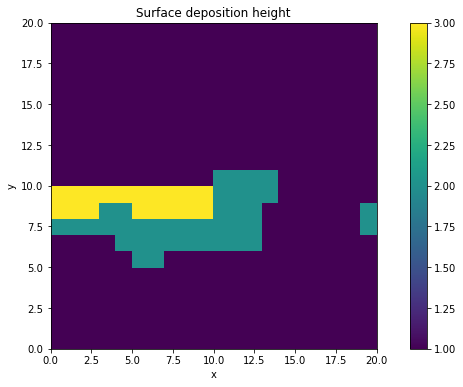

In [ ]:
import matplotlib.pyplot as plt
xr, yr = test.surface[:,:,-1].shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, test.surface[:,:,-50])
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()
#plt.savefig('Spiral_Growth_v1.png')

In [ ]:
class grow_crystal():
    """The growth of a crystal with dislocations.
    
    Parameter
    ---------
    
    """
    def __init__(self, dims, mu, T, set_migration):
        self.T = T
        self.mu = mu
        self.dims = dims
        self.fx_matrix = np.zeros(dims)
        self.bx_matrix = np.zeros(dims)
        self.fy_matrix = np.zeros(dims)
        self.by_matrix = np.zeros(dims)
        self.num_dislocations = 0
        self.time = 0
        self.surface = np.ones(self.dims)
        self.surface = self.surface[:,:,np.newaxis]
        self.neigh = np.array([])
        self.set_migration = set_migration #{True, False}
    
    def dislocation_matrices(self, face, face_loc, boundaries, b):
        """Defining a  dislocation line on the (001) cystal surface."""
        
        line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
        dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
        f_matrix = np.zeros(self.dims)
        b_matrix = np.zeros(self.dims)
        if face == 0:
            f_matrix[face_loc, line] = dislocation_line
            b_matrix[face_loc-1, line] = -dislocation_line
            self.fx_matrix += f_matrix
            self.bx_matrix += b_matrix
        elif face == 1:
            f_matrix[line, face_loc] = dislocation_line
            b_matrix[line, face_loc-1] = -dislocation_line
            self.fy_matrix += f_matrix
            self.by_matrix += b_matrix
        else:
            raise ValueWarning('Value for [face] should be either 0 or 1')
        self.num_dislocations += 1
        print('crystal surface with {} dislocations'.format(str(self.num_dislocations)))
    
    def num_dislocations(self):
        print('There are {} dislocations'.format(str(self.num_dislocations)))
    
    def migration(selft):
        if self.set_migration == True:
            print('Atoms are allowed to migrate')
        else:
            print('Atoms are not allowed to migrate')
    
    def scan_neighbours(self, surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc):
        """Scanning how many neighbours an atom on the surface has."""
        
        dims = self.dims
        n = 1
        if surface[loc] <= fx_neigh[(loc[0]+1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= fy_neigh[loc[0] % dims[0], (loc[1]+1) % dims[1]]:
            n += 1
        if surface[loc] <= bx_neigh[(loc[0]-1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= by_neigh[loc[0] % dims[0], (loc[1]-1) % dims[1]]:
            n += 1
        return n
    
    def neighbours(self):
        """Identifying the number of neighbours of each surface atom using periodic boundary
        conditions for a surface with a single dislocation."""
        
        dims = self.dims
        neigh = np.zeros(dims)
        surface = self.surface[:,:,self.time]
        fx_neigh = surface + self.fx_matrix
        bx_neigh = surface + self.bx_matrix
        fy_neigh = surface + self.fy_matrix
        by_neigh = surface + self.by_matrix
        for i in range(dims[0]):
            for j in range(dims[1]):
                loc = (i,j)
                n = self.scan_neighbours(surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc)
                neigh[i,j] = n
        return neigh
    
    def evaporation_rate(self, n):
        """The evaporation rate based on the number of neighbours and temperature."""
        
        k_minus = np.exp(-n*self.T)
        return k_minus
    
    def impingement_rate(self):
        """The impingement rate based on the chemical potential and temperature."""
        
        k_3 = self.evaporation_rate(3)
        k_plus = np.exp(self.mu)*k_3
        return k_plus
    
    def nn_migration_rate(self, n):
        if self.set_migration == True:
            if n == 1:
                Esd = 1/2
            elif n == 2:
                Esd = 3/2
            else:
                Esd = 5/2
            k_nn = 1/8*np.exp(-Esd*self.T)
        else:
            k_nn = 0
        return k_nn
    
    def nm_migration_rate(self, loc_n, loc_m, neigh):
        if self.set_migration == True:
            n = neigh[loc_n]
            new_surface = self.surface[:,:,self.time]
            new_surface[loc_n] += -1
            new_surface[loc_m] += 1
            fx_neighbour = new_surface + self.fx_matrix
            fy_neighbour = new_surface + self.fy_matrix
            bx_neighbour = new_surface + self.bx_matrix
            by_neighbour = new_surface + self.by_matrix
            m = self.scan_neighbours(new_surface, fx_neighbour, fy_neighbour, bx_neighbour, by_neighbour, loc_m)
            
            if n == 1 or m == 1:
                Esd = 1/2
            elif n == 2 or m == 2:
                Esd = 3/2
            else:
                Esd = 5/2
            
            if m <= n:
                DeltaE = n-m
            else:
                DeltaE = 0
            
            k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
        else:
            k_nm = 0
        return k_nm
    
    def choose_subset(self):
        T = self.T
        mu = self.mu
        counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
        if self.time == 0:
            first_neigh = self.neighbours()
            self.neigh = first_neigh[:,:,np.newaxis]
        neigh = self.neigh[:,:,self.time]
        unique, counting = np.unique(neigh, return_counts = True)
        index = 0
        impingement_rate = self.impingement_rate()
        
        for number in unique:
            counts[number] = counting[index]
            index += 1

        denom = 0
        for i in range(1,6):
            denom += counts[i] * (self.evaporation_rate(i) + impingement_rate
                                  + self.nn_migration_rate(i))

        prob = np.zeros(5)
        for i in range(5):
            prob[i] = counts[i+1] * (self.evaporation_rate(i+1) + impingement_rate
                                     + self.nn_migration_rate(i+1)) / denom

        rand = uniform(0,1)
        if rand < prob[0]:
            subset = 1
        elif rand < prob[0] + prob[1]:
            subset = 2
        elif rand < prob[0] + prob[1] + prob[2]:
            subset = 3
        elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
            subset = 4
        elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
            subset = 5
        
        return subset
    
    def interaction(self):
        dims = self.dims
        surface = self.surface[:,:,self.time]
        change_surface = np.zeros(dims)
        subset = self.choose_subset()
        neigh = self.neigh[:,:,self.time]
        options_x = np.where(neigh==subset)[0]
        options_y = np.where(neigh==subset)[1]
        site = choice(range(np.size(options_x)))

        location = (options_x[site], options_y[site])

        k_plus = self.impingement_rate()
        k_minus = self.evaporation_rate(subset)
        k_nn = self.nn_migration_rate(subset)

        denom = k_plus + k_minus# + k_nn
        scan_loc_matrix = [(0,0), (0,-1), (0,1), (-1,0), (1,0)]
        change_neigh = np.zeros(dims)

        rand = uniform(0,1)
        if rand < k_plus/denom:
            change_surface[location] += 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                (location[0]+i[0], location[1]+i[1])
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        elif rand < (k_plus+k_minus)/denom:
            change_surface[location] -= 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        else:
            options = [(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)]
            migrate = choice(options)
            prob = self.nm_migration_rate(location, migrate, neigh)
            rand = uniform(0,1)
            if rand < prob:
                change_surface[location] -= 1
                change_surface[(location[0]+migrate[0]) % dims[0], (location[1]+migrate[1]) % dims[1]] +=1
                new_surface = surface + change_surface
                for i in scan_loc_matrix:
                    scan_loc1 = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                    scan_loc2 = ((migrate[0]+i[0]) % dims[0], (migrate[1]+i[1]) % dims[1])
                    fx_neigh = new_surface + self.fx_matrix
                    fy_neigh = new_surface + self.fy_matrix
                    bx_neigh = new_surface + self.bx_matrix
                    by_neigh = new_surface + self.by_matrix
                    change_neigh[scan_loc1] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc1) - neigh[scan_loc1]
                    change_neigh[scan_loc2] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc2) - neigh[scan_loc2]
                new_neigh = neigh + change_neigh
            else:
                new_neigh = neigh
        self.surface = np.append(self.surface, new_surface[:,:,np.newaxis], axis=2)
        self.neigh = np.append(self.neigh, new_neigh[:,:,np.newaxis], axis=2)
        self.time += 1

In [ ]:
import numpy as np
from random import uniform, choice
dims = (80, 80)
mu = 1.5
T = 4
set_migration = True
test = grow_crystal(dims, mu, T, set_migration)

face = 0
face_loc = 40
boundaries = [0, 40]
b = 2
test.dislocation_matrices(face, face_loc, boundaries, b)

crystal surface with 1 dislocations


In [ ]:
N = 1
for i in range(N):
    test.interaction()
print(test.time)

1


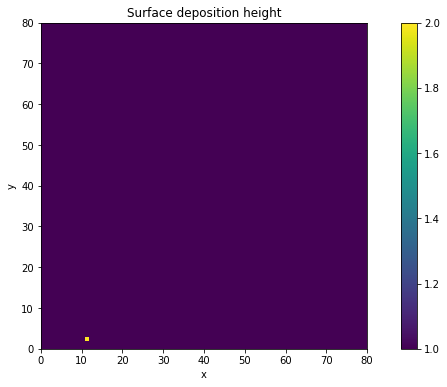

In [ ]:
import matplotlib.pyplot as plt
xr, yr = test.surface[:,:,-1].shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, test.surface[:,:,-1])
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()


In [ ]:
n = np.arange(1,6,1)
k_plus = test.impingement_rate()
k_minus = test.evaporation_rate(n)
k_nn = np.zeros(np.shape(n))
for i in n:
    k_nn[n-1] = test.nn_migration_rate(i)
N = np.array([0, 0, 0, 40, 6360])
rate = k_plus/(np.sum(n*(k_plus+k_minus+k_nn)))
print('compute time to  one atom is {}'.format(str(rate)))
n_rate = 1/rate
print('number of simulations to add one atom is {}'.format(str(n_rate)))
print(n_rate*6400)

compute time to  one atom is 0.0014118628682088597
number of simulations to add one atom is 708.28408517368
4533018.1451115515


# Prevent kernal form dying

In [ ]:
class grow_crystal():
    """The growth of a crystal with dislocations.
    
    Parameter
    ---------
    
    """
    def __init__(self, dims, mu, T, set_migration):
        self.T = T
        self.mu = mu
        self.dims = dims
        self.fx_matrix = np.zeros(dims)
        self.bx_matrix = np.zeros(dims)
        self.fy_matrix = np.zeros(dims)
        self.by_matrix = np.zeros(dims)
        self.num_dislocations = 0
        self.time = 0
        self.surface = np.ones(self.dims)
        self.N_surface = self.surface[:,:,np.newaxis]
        self.neigh = np.array([])
        self.set_migration = set_migration #{True, False}
    
    def dislocation_matrices(self, face, face_loc, boundaries, b):
        """Defining a  dislocation line on the (001) cystal surface."""
        
        line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
        dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
        f_matrix = np.zeros(self.dims)
        b_matrix = np.zeros(self.dims)
        if face == 0:
            f_matrix[face_loc, line] = dislocation_line
            b_matrix[face_loc-1, line] = -dislocation_line
            self.fx_matrix += f_matrix
            self.bx_matrix += b_matrix
        elif face == 1:
            f_matrix[line, face_loc] = dislocation_line
            b_matrix[line, face_loc-1] = -dislocation_line
            self.fy_matrix += f_matrix
            self.by_matrix += b_matrix
        else:
            raise ValueWarning('Value for [face] should be either 0 or 1')
        self.num_dislocations += 1
        print('crystal surface with {} dislocations'.format(str(self.num_dislocations)))
    
    def num_dislocations(self):
        print('There are {} dislocations'.format(str(self.num_dislocations)))
    
    def migration(selft):
        if self.set_migration == True:
            print('Atoms are allowed to migrate')
        else:
            print('Atoms are not allowed to migrate')
    
    def scan_neighbours(self, surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc):
        """Scanning how many neighbours an atom on the surface has."""
        
        dims = self.dims
        n = 1
        if surface[loc] <= fx_neigh[(loc[0]+1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= fy_neigh[loc[0] % dims[0], (loc[1]+1) % dims[1]]:
            n += 1
        if surface[loc] <= bx_neigh[(loc[0]-1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= by_neigh[loc[0] % dims[0], (loc[1]-1) % dims[1]]:
            n += 1
        return n
    
    def neighbours(self):
        """Identifying the number of neighbours of each surface atom using periodic boundary
        conditions for a surface with a single dislocation."""
        
        dims = self.dims
        neigh = np.zeros(dims)
        surface = self.surface
        fx_neigh = surface + self.fx_matrix
        bx_neigh = surface + self.bx_matrix
        fy_neigh = surface + self.fy_matrix
        by_neigh = surface + self.by_matrix
        for i in range(dims[0]):
            for j in range(dims[1]):
                loc = (i,j)
                n = self.scan_neighbours(surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc)
                neigh[i,j] = n
        return neigh
    
    def evaporation_rate(self, n):
        """The evaporation rate based on the number of neighbours and temperature."""
        
        k_minus = np.exp(-n*self.T)
        return k_minus
    
    def impingement_rate(self):
        """The impingement rate based on the chemical potential and temperature."""
        
        k_3 = self.evaporation_rate(3)
        k_plus = np.exp(self.mu)*k_3
        return k_plus
    
    def nn_migration_rate(self, n):
        if self.set_migration == True:
            if n == 1:
                Esd = 1/2
            elif n == 2:
                Esd = 3/2
            else:
                Esd = 5/2
            k_nn = 1/8*np.exp(-Esd*self.T)
        else:
            k_nn = 0
        return k_nn
    
    def nm_migration_rate(self, loc_n, loc_m, neigh):
        if self.set_migration == True:
            n = neigh[loc_n]
            new_surface = self.surface
            new_surface[loc_n] += -1
            new_surface[loc_m] += 1
            fx_neighbour = new_surface + self.fx_matrix
            fy_neighbour = new_surface + self.fy_matrix
            bx_neighbour = new_surface + self.bx_matrix
            by_neighbour = new_surface + self.by_matrix
            m = self.scan_neighbours(new_surface, fx_neighbour, fy_neighbour, bx_neighbour, by_neighbour, loc_m)
            
            if n == 1 or m == 1:
                Esd = 1/2
            elif n == 2 or m == 2:
                Esd = 3/2
            else:
                Esd = 5/2
            
            if m <= n:
                DeltaE = n-m
            else:
                DeltaE = 0
            
            k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
        else:
            k_nm = 0
        return k_nm
    
    def choose_subset(self):
        T = self.T
        mu = self.mu
        counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
        if self.time == 0:
            first_neigh = self.neighbours()
            self.neigh = first_neigh
        neigh = self.neigh
        unique, counting = np.unique(neigh, return_counts = True)
        index = 0
        impingement_rate = self.impingement_rate()
        
        for number in unique:
            counts[number] = counting[index]
            index += 1

        denom = 0
        for i in range(1,6):
            denom += counts[i] * (self.evaporation_rate(i) + impingement_rate
                                  + self.nn_migration_rate(i))

        prob = np.zeros(5)
        for i in range(5):
            prob[i] = counts[i+1] * (self.evaporation_rate(i+1) + impingement_rate
                                     + self.nn_migration_rate(i+1)) / denom

        rand = uniform(0,1)
        if rand < prob[0]:
            subset = 1
        elif rand < prob[0] + prob[1]:
            subset = 2
        elif rand < prob[0] + prob[1] + prob[2]:
            subset = 3
        elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
            subset = 4
        elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
            subset = 5
        
        return subset
    
    def interaction(self):
        dims = self.dims
        surface = self.surface
        change_surface = np.zeros(dims)
        subset = self.choose_subset()
        neigh = self.neigh
        options_x = np.where(neigh==subset)[0]
        options_y = np.where(neigh==subset)[1]
        site = choice(range(np.size(options_x)))

        location = (options_x[site], options_y[site])

        k_plus = self.impingement_rate()
        k_minus = self.evaporation_rate(subset)
        k_nn = self.nn_migration_rate(subset)

        denom = k_plus + k_minus + k_nn
        scan_loc_matrix = [(0,0), (0,-1), (0,1), (-1,0), (1,0)]
        change_neigh = np.zeros(dims)

        rand = uniform(0,1)
        if rand < k_plus/denom:
            change_surface[location] += 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                (location[0]+i[0], location[1]+i[1])
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        elif rand < (k_plus+k_minus)/denom:
            change_surface[location] -= 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        else:
            options = [(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)]
            migrate = choice(options)
            prob = self.nm_migration_rate(location, migrate, neigh)
            rand = uniform(0,1)
            if rand < prob:
                change_surface[location] -= 1
                change_surface[(location[0]+migrate[0]) % dims[0], (location[1]+migrate[1]) % dims[1]] +=1
                new_surface = surface + change_surface
                for i in scan_loc_matrix:
                    scan_loc1 = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                    scan_loc2 = ((migrate[0]+i[0]) % dims[0], (migrate[1]+i[1]) % dims[1])
                    fx_neigh = new_surface + self.fx_matrix
                    fy_neigh = new_surface + self.fy_matrix
                    bx_neigh = new_surface + self.bx_matrix
                    by_neigh = new_surface + self.by_matrix
                    change_neigh[scan_loc1] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc1) - neigh[scan_loc1]
                    change_neigh[scan_loc2] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc2) - neigh[scan_loc2]
                new_neigh = neigh + change_neigh
            else:
                new_surface = surface
                new_neigh = neigh
        self.surface = new_surface
        self.neigh = new_neigh
        self.time += 1
        if self.time % 10 == 0: #If it stores too many surface matrices the kernal dies
            self.N_surface = np.append(self.N_surface, new_surface[:,:,np.newaxis], axis=2)
print('Done')

Done


In [ ]:
import numpy as np
from random import uniform, choice
dims = (80, 80)
mu = 1.5
T = 4
set_migration = True
test = grow_crystal(dims, mu, T, set_migration)

face = 0
face_loc = 40
boundaries = [0, 40]
b = 2
test.dislocation_matrices(face, face_loc, boundaries, b)

crystal surface with 1 dislocations


In [ ]:
dN = 10
N = 100
for i in range(N):
    test.interaction()
print(test.time)
print(np.shape(test.N_surface))

100
(80, 80, 11)


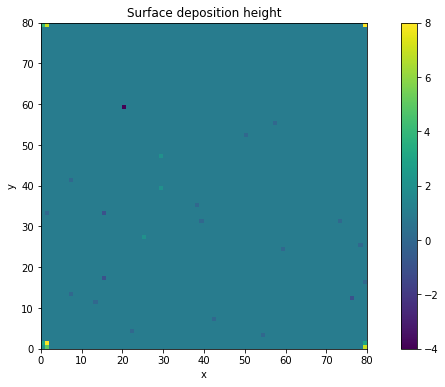

In [ ]:
import matplotlib.pyplot as plt
xr, yr = test.N_surface[:,:,-1].shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, test.N_surface[:,:,-1])
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()

In [ ]:
class grow_crystal():
    """The growth of a crystal with dislocations.
    
    Parameter
    ---------
    dims : Tulple
        The dimensions of the crystal surface
    mu : float
        The dimensionless chemical potential
    T : float
        The dimensionless temperature
    set_migration : {True, False}
        If True surface migration is allowed
        If False surface migration is NOT allowed
    
    Return
    ------
    time : int
        The number of cycles (atom interactions)
    surface : nd.array
        The crystal surface at the last cycle
    N_surface : nd.array
        The crystal surface at different cycles
    neigh : nd.array
        The number of neighbours of all the atoms at the last cycle
    """

    def __init__(self, dims, mu, T, set_migration):
        self.T = T
        self.mu = mu
        self.dims = dims
        self.fx_matrix = np.zeros(dims)
        self.bx_matrix = np.zeros(dims)
        self.fy_matrix = np.zeros(dims)
        self.by_matrix = np.zeros(dims)
        self.num_dislocations = 0
        self.time = 0
        self.surface = np.ones(self.dims)
        self.N_surface = self.surface[:,:,np.newaxis]
        self.neigh = np.array([])
        self.set_migration = set_migration
    
    def dislocation_matrices(self, face, face_loc, boundaries, b):
        """Defining a dislocation line on the (001) cystal surface and create matrices to model
        the dislocations when the number of neighbouring atoms is determined.

        Parameter
        ---------
        face : int --> {0, 1}
            The plain the dislocation line is located in
            Value
            -----
            0 : dislocation line lies in the (100) plain
            1 : dislocation line lies in the (010) plain
        face_loc : int --> {1:dims[i]-1}
            The location of the plane the dislocation line lies in. For
            [face_loc] = n, the dislocation is between the (n-1)th and nth atom
        boundaries : Tulple --> [start, end]
        The boundaries of the dislocation line with [start] < [end]
            Value
            -----
            start : {0:dims[i]-1}
            end : {1:dims[i]}
        b : int
            The magnitude of the Burgers vector
            If b=0, there is no dislocation
            If b>0, the step will go up
            If b<0, the step will go down
        """
        
        line = np.arange(boundaries[0], boundaries[1], 1, dtype=int)
        dislocation_line = np.ones(boundaries[1]-boundaries[0])*b
        f_matrix = np.zeros(self.dims)
        b_matrix = np.zeros(self.dims)
        if face == 0:
            f_matrix[face_loc, line] = dislocation_line
            b_matrix[face_loc-1, line] = -dislocation_line
            self.fx_matrix += f_matrix
            self.bx_matrix += b_matrix
        elif face == 1:
            f_matrix[line, face_loc] = dislocation_line
            b_matrix[line, face_loc-1] = -dislocation_line
            self.fy_matrix += f_matrix
            self.by_matrix += b_matrix
        else:
            raise ValueWarning('Value for [face] should be either 0 or 1')
        self.num_dislocations += 1
        print('crystal surface with {} dislocations'.format(str(self.num_dislocations)))

    
    def num_dislocations(self):
        print('There are {} dislocations'.format(str(self.num_dislocations)))

        
    def migration(selft):
        if self.set_migration == True:
            print('Atoms are allowed to migrate')
        else:
            print('Atoms are not allowed to migrate')


    def scan_neighbours(self, surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc):
        """Scanning how many neighbours an atom on the surface has.
        
        Parameter
        ---------
        surface : nd.array
        fx_neigh : nd.array
        fy_neigh : nd.array
        bx_neigh : nd.array
        by_neigh : nd.array
        loc : Tulple
        
        Return
        ------
        n : int
        """
        
        dims = self.dims
        n = 1
        if surface[loc] <= fx_neigh[(loc[0]+1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= fy_neigh[loc[0] % dims[0], (loc[1]+1) % dims[1]]:
            n += 1
        if surface[loc] <= bx_neigh[(loc[0]-1) % dims[0], loc[1] % dims[1]]:
            n += 1
        if surface[loc] <= by_neigh[loc[0] % dims[0], (loc[1]-1) % dims[1]]:
            n += 1
        return n


    def neighbours(self):
        """Identifying the number of neighbours of each surface atom using periodic boundary
        conditions for a surface with a single dislocation.
        
        Return
        ------
        neigh : nd.array
            Matrix with the number of neighboring atoms for every atom on the crystal surface
        """
        
        dims = self.dims
        neigh = np.zeros(dims)
        surface = self.surface
        fx_neigh = surface + self.fx_matrix
        bx_neigh = surface + self.bx_matrix
        fy_neigh = surface + self.fy_matrix
        by_neigh = surface + self.by_matrix
        for i in range(dims[0]):
            for j in range(dims[1]):
                loc = (i,j)
                n = self.scan_neighbours(surface, fx_neigh, fy_neigh, bx_neigh, by_neigh, loc)
                neigh[i,j] = n
        return neigh


    def evaporation_rate(self, n):
        """The evaporation rate of an atom based on the number of neighbours and temperature.
        
        Parameter
        ---------
        n : int
            Number of neighbours of an atom
        
        Return
        ------
        k_minus : float
            The evaporation rate of an atom
        """
        
        k_minus = np.exp(-n*self.T)
        return k_minus


    def impingement_rate(self):
        """The impingement rate of an atom based on the chemical potential and temperature.
        
        Return
        ------
        k_plus : float
            The impingement rate of an atom
        """
        
        k_3 = self.evaporation_rate(3)
        k_plus = np.exp(self.mu)*k_3
        return k_plus


    def nn_migration_rate(self, n):
        """The migration rate of an atom moving from a location of n neighbours to a location of 
        n neighbours. If migration is not allowed the migration rate is set to 0.
        
        Parameter
        ---------
        n : int
            The number of neighbours of the atom
        
        Return
        ------
        k_nn : float
            The migration rate
        """
        if self.set_migration == True:
            if n == 1:
                Esd = 1/2
            elif n == 2:
                Esd = 3/2
            else:
                Esd = 5/2
            k_nn = 1/8*np.exp(-Esd*self.T)
        else:
            k_nn = 0
        return k_nn
    
    def nm_migration_rate(self, loc_n, loc_m, neigh):
        """The migration rate for an atom moving from location [loc_n] to location [loc_m]. If
        migration is not allowed the migration rate is set to 0.
        
        Parameter
        ---------
        loc_n : Tulple
            The initial coordinate of the atom
        loc_m : Tulple
            The new coordinate of the atom
        neigh : nd.array
            The number of neighbours of all the atoms in the initial state of the crystal surface
        
        Return
        ------
        k_nm : float
            The migration rate between the two coordinates
        """
        if self.set_migration == True:
            n = neigh[loc_n]
            new_surface = self.surface
            new_surface[loc_n] += -1
            new_surface[loc_m] += 1
            fx_neighbour = new_surface + self.fx_matrix
            fy_neighbour = new_surface + self.fy_matrix
            bx_neighbour = new_surface + self.bx_matrix
            by_neighbour = new_surface + self.by_matrix
            m = self.scan_neighbours(new_surface, fx_neighbour, fy_neighbour, bx_neighbour, by_neighbour, loc_m)
            
            if n == 1 or m == 1:
                Esd = 1/2
            elif n == 2 or m == 2:
                Esd = 3/2
            else:
                Esd = 5/2

            if m <= n:
                DeltaE = n-m
            else:
                DeltaE = 0

            k_nm = 1/8*np.exp(-(Esd+DeltaE)*T)
        else:
            k_nm = 0
        return k_nm
    
    def choose_subset(self):
        """Choose a subset based on the number of neighbours an atom has.
        
        Return
        ------
        subset : int
            The number of neighbours all the atoms in the subset have
        """
        T = self.T
        mu = self.mu
        counts = dict(zip([1, 2, 3, 4, 5], [0, 0, 0, 0, 0]))
        if self.time == 0:
            first_neigh = self.neighbours()
            self.neigh = first_neigh
        neigh = self.neigh
        unique, counting = np.unique(neigh, return_counts = True)
        index = 0
        impingement_rate = self.impingement_rate()
        
        for number in unique:
            counts[number] = counting[index]
            index += 1

        denom = 0
        for i in range(1,6):
            denom += counts[i] * (self.evaporation_rate(i) + impingement_rate
                                  + self.nn_migration_rate(i))

        prob = np.zeros(5)
        for i in range(5):
            prob[i] = counts[i+1] * (self.evaporation_rate(i+1) + impingement_rate
                                     + self.nn_migration_rate(i+1)) / denom

        rand = uniform(0,1)
        if rand < prob[0]:
            subset = 1
        elif rand < prob[0] + prob[1]:
            subset = 2
        elif rand < prob[0] + prob[1] + prob[2]:
            subset = 3
        elif rand < prob[0] + prob[1] + prob[2] + prob[3]:
            subset = 4
        elif rand < prob[0] + prob[1] + prob[2] + +prob[3] + prob[4]:
            subset = 5
        
        return subset
    
    def interaction(self, dN):
        """Simulating an interaction at one location on the crystal surface. The interaction has 
        two possible outcomes if surface migration is not allowed:
        1. an atom evaporates from the surface
        2. there is an atom impingement
        The interaction has four possible outcomes if surface migration is allowed:
        1. an atom evaporates from the surface
        2. there is an atom impingement
        3. an atom migrates to a neighbouring location
        4. nothing happens the surface is unchanged
        
        Parameter
        ---------
        dN : int
            The number of cycles run between subsequent crystal surfaces stored in self.N_surface
        """
        dims = self.dims
        surface = self.surface
        change_surface = np.zeros(dims)
        subset = self.choose_subset()
        neigh = self.neigh
        options_x = np.where(neigh==subset)[0]
        options_y = np.where(neigh==subset)[1]
        site = choice(range(np.size(options_x)))

        location = (options_x[site], options_y[site])

        k_plus = self.impingement_rate()
        k_minus = self.evaporation_rate(subset)
        k_nn = self.nn_migration_rate(subset)

        denom = k_plus + k_minus + k_nn
        scan_loc_matrix = [(0,0), (0,-1), (0,1), (-1,0), (1,0)]
        change_neigh = np.zeros(dims)

        rand = uniform(0,1)
        if rand < k_plus/denom:
            change_surface[location] += 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                (location[0]+i[0], location[1]+i[1])
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        elif rand < (k_plus+k_minus)/denom:
            change_surface[location] -= 1
            new_surface = surface + change_surface
            for i in scan_loc_matrix: #create new neighbour matrix
                scan_loc = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                fx_neigh = new_surface + self.fx_matrix
                fy_neigh = new_surface + self.fy_matrix
                bx_neigh = new_surface + self.bx_matrix
                by_neigh = new_surface + self.by_matrix
                change_neigh[scan_loc] = self.scan_neighbours(new_surface, fx_neigh, 
                                                              fy_neigh, bx_neigh, 
                                                              by_neigh, scan_loc) - neigh[scan_loc]
            new_neigh = neigh + change_neigh
        else:
            options = [(1,1),(1,0),(1,-1),(0,1),(0,-1),(-1,1),(-1,0),(-1,-1)]
            migrate = choice(options)
            prob = self.nm_migration_rate(location, migrate, neigh)
            rand = uniform(0,1)
            if rand < prob:
                change_surface[location] -= 1
                change_surface[(location[0]+migrate[0]) % dims[0], (location[1]+migrate[1]) % dims[1]] +=1
                new_surface = surface + change_surface
                for i in scan_loc_matrix: #crate new neighbour matrix
                    scan_loc1 = ((location[0]+i[0]) % dims[0], (location[1]+i[1]) % dims[1])
                    scan_loc2 = ((migrate[0]+i[0]) % dims[0], (migrate[1]+i[1]) % dims[1])
                    fx_neigh = new_surface + self.fx_matrix
                    fy_neigh = new_surface + self.fy_matrix
                    bx_neigh = new_surface + self.bx_matrix
                    by_neigh = new_surface + self.by_matrix
                    change_neigh[scan_loc1] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc1) - neigh[scan_loc1]
                    change_neigh[scan_loc2] = self.scan_neighbours(new_surface, fx_neigh,
                                                                   fy_neigh, bx_neigh,
                                                                   by_neigh, scan_loc2) - neigh[scan_loc2]
                new_neigh = neigh + change_neigh
            else:
                new_surface = surface
                new_neigh = neigh
        self.surface = new_surface
        self.neigh = new_neigh
        self.time += 1
        if self.time % dN == 0: #If it stores too many surface matrices the kernal dies
            self.N_surface = np.append(self.N_surface, new_surface[:,:,np.newaxis], axis=2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform, choice

dims = (20, 20)
mu = 1.5
T = 4
set_migration = False
test = grow_crystal(dims, mu, T, set_migration)

face = 0
face_loc = 10
boundaries = [0, 10]
b = 2
test.dislocation_matrices(face, face_loc, boundaries, b)

crystal surface with 1 dislocations


In [ ]:
dN = 10
N = 100
for i in range(N):
    test.interaction(dN)
print(test.time)
print(np.shape(test.N_surface))

100
(20, 20, 11)


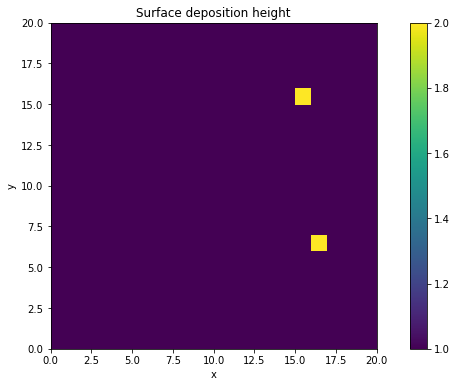

In [ ]:
xr, yr = test.N_surface[:,:,-1].shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, test.N_surface[:,:,-1])
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()

# Surface correnction for surface plot

The matrix of the crystal surface does not contain a dislocation. When the surface of the crystal is plotted this dislocation has to be created for the plot to accuratly describe the hight of the surface. For this purpose a spiral is generated which is then added to the surface matrix. the hight will therefore not be a matrix of integer numbers (i.e. the number of atoms stacked uppon each other) any more.\
\
The surface will spiral around the ends of the dislocation. The ends of the dislocation will be denoted as $b_1$ and $b_2$. 

In [ ]:
def test_surface_correction(dims, face, face_loc, boundaries, b):
    theta1 = np.zeros(dims)
    theta2 = np.zeros(dims)
    if face == 0:
        b1 = np.array([0,1])
        b2 = np.array([0,-1])
        origin1 = np.array([face_loc-1/2, boundaries[0]-1/2])
        origin2 = np.array([face_loc-1/2, boundaries[1]-1/2])
        for i in range(dims[0]):
            for j in range(dims[1]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                if r1_ij[0] < 0:
                    theta1[i,j] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                    theta2[i,j] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
                else:
                    theta1[i,j] = 2*np.pi - np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)
                                                                         *np.linalg.norm(r1_ij)))
                    theta2[i,j] = 2*np.pi - np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)
                                                                         *np.linalg.norm(r2_ij)))
    else:
        b1 = np.array([1,0])
        b2 = np.array([1,0])
        origin1 = np.array([boundaries[0]-1/2, face_loc-1/2])
        origin2 = np.array([boundaries[1]-1/2, face_loc-1/2])
        for i in range(dims[0]):
            for j in range(dims[1]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                theta1[i,j] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                theta2[i,j] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
    #correction_surface = b * ((np.ones(dims) - theta1/(2*np.pi)) + (np.ones(dims) - theta2/(2*np.pi)))
    correction_surface = b * (np.ones(dims) - theta2/(2*np.pi))
    
    return correction_surface

In [ ]:
import numpy as np


def surface_correction(self, face, face_loc, boundaries, b):
    """Correction matrix to the surface matrix which is a matrix representation of a spiral,
    which is what a surface becomes when it contains a dislocation."""
    
    theta1 = np.zeros(self.dims)
    theta2 = np.zeros(self.dims)
    if face == 0:
        b1 = np.array([0,1])
        b2 = np.array([0,-1])
        origin1 = np.array([face_loc+1/2, boundaries[0]-1/2])
        origin2 = np.array([face_loc+1/2, boundaries[1]-1/2])
        for i in range(self.dims[0]):
            for j in range(self.dims[1]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                theta1[i,j] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                theta2[i,j] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
        correction_surface = (b * (np.ones(self.dims) - theta1/(2*np.pi))
                               * (np.ones(self.dims) - theta2/(2*np.pi)))
    else:
        b1 = np.array([1,0])
        b2 = np.array([1,0])
        origin1 = np.array([boundaries[0]-1/2, face_loc+1/2])
        origin2 = np.array([boundaries[1]-1/2, face_loc+1/2])
        for i in range(self.dims[0]):
            for j in range(self.dims[1]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                theta1[i,j] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                theta2[i,j] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
        correction_surface = (b * (np.ones(self.dims) - theta1/(2*np.pi))
                               * (np.ones(self.dims) - theta2/(2*np.pi)))
    
    return correnction_surface


def test_surface_correction(dims, face, face_loc, boundaries, b):
    theta1 = np.zeros([dims[0]*3, dims[1]*3])
    theta2 = np.zeros([dims[0]*3, dims[1]*3])
    if face == 0:
        b1 = np.array([0,1])
        b2 = np.array([0,-1])
        origin1 = np.array([face_loc-1/2, boundaries[0]-1/2])
        origin2 = np.array([face_loc-1/2, boundaries[1]-1/2])
        for i in range(-dims[0],2*dims[0]):
            for j in range(-dims[1],2*dims[0]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                if r1_ij[0] < 0:
                    theta1[i+dims[0],j+dims[1]] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                    theta2[i+dims[0],j+dims[1]] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
                else:
                    theta1[i+dims[0],j+dims[1]] = 2*np.pi - np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)
                                                                         *np.linalg.norm(r1_ij)))
                    theta2[i+dims[0],j+dims[1]] = 2*np.pi - np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)
                                                                         *np.linalg.norm(r2_ij)))
    else:
        b1 = np.array([1,0])
        b2 = np.array([1,0])
        origin1 = np.array([boundaries[0]-1/2, face_loc-1/2])
        origin2 = np.array([boundaries[1]-1/2, face_loc-1/2])
        for i in range(dims[0]):
            for j in range(dims[1]):
                r1_ij = np.array([i,j]) - origin1
                r2_ij = np.array([i,j]) - origin2
                theta1[i,j] = np.arccos(np.dot(b1, r1_ij)/(np.linalg.norm(b1)*np.linalg.norm(r1_ij)))
                theta2[i,j] = np.arccos(np.dot(b2, r2_ij)/(np.linalg.norm(b2)*np.linalg.norm(r2_ij)))
    correction_surface1 = b * (np.ones([dims[0]*3,dims[1]*3]) - theta1/(2*np.pi))
    correction_surface2 = b * (np.ones([dims[0]*3,dims[1]*3]) - theta2/(2*np.pi))
    
    return correction_surface1, correction_surface2

In [ ]:
import numpy as np
dims = (80, 80)
face = 0
face_loc = 40
boundaries = [0, 40]
b = 2

surf_correction1, surf_correction2 = test_surface_correction(dims, face, face_loc, boundaries, b)

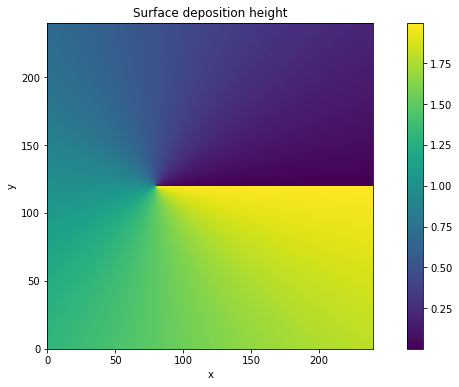

In [ ]:
import matplotlib.pyplot as plt
xr, yr = surf_correction1.shape
x, y = np.arange(xr+1), np.arange(yr+1)

plt.figure(figsize=[12,6])
plt.pcolor(x, y, surf_correction1)
plt.gca().set_aspect('equal')
plt.title("Surface deposition height")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.colorbar()

# Old text

This section is focused on indentifying the natural units and converting the parameters to dimensionless units 

We first focus on the impingement, evaporation and surface migration rate. These rates have been defined as
\begin{equation}
    \begin{split}
        k^{+} &= \mathrm{exp}\left(\Delta \mu / k_{B} T \right) k_{3}^{-},\\
        k_{n}^{-} &= \nu \, \mathrm{exp}\left(- n \varphi / k_{B} T \right),\\
        k_{nm} &= \frac{1}{8} \nu \, \mathrm{exp}\left\{- \left[ E_{\mathrm{sd}} (n,m) + \Delta E (n,m) \right] / k_{B} T \right\},
    \end{split}
\end{equation}
respectively.\
The natural units in these three equations are:
- The frequency factor $\nu$ which represents the frequency at which collisions occur.
- The Boltzmann constant $k_{B}$.
- The energy required to break the bond with one neighbor $\varphi$.

From these equations we can create the following dimensionless parameters
\begin{equation}
    \tilde{k} = \frac{k}{\nu}, \qquad \qquad \tilde{T} = \frac{k_{B}}{\varphi} T, \qquad \qquad \tilde{\mu} = \frac{\mu}{\varphi}, \qquad \qquad \tilde{E} = \frac{E}{\varphi}.
\end{equation}
The dimensionless impingement, evaporation and surface migration rate will then become
\begin{equation}
    \begin{split}
        \tilde{k}^{+} &= \mathrm{exp}\left(\Delta \tilde{\mu} / \tilde{T} \right) \tilde{k}_{3}^{-},\\
        \tilde{k}_{n}^{-} &= \mathrm{exp}\left(- n / \tilde{T} \right),\\
        \tilde{k}_{nm} &= \frac{1}{8} \mathrm{exp}\left\{- \left[ \tilde{E}_{\mathrm{sd}} (n,m) + \Delta \tilde{E} (n,m) \right] / \tilde{T} \right\},
    \end{split}
\end{equation}

The activation energy $E_{sd}$ is specified as
\begin{equation}
    E_\mathrm{sd} (n,m) = \begin{cases} \varphi/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 \varphi / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 \varphi /2, & \mbox{if } n \mbox{ and } m>2, \end{cases}
\end{equation}
and the $\textbf{other}$ energy $\Delta E$ is specified as
\begin{equation}
    \Delta E (n,m) = \begin{cases} (n-m)\varphi & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}
\end{equation}

Converting these energies into dimensionless units will give
\begin{equation}
    \begin{split}
        \tilde{E}_\mathrm{sd} (n,m) &= \begin{cases} 1/2, & \mbox{if either } m = 1 \mbox{ or } n = 1 \\ 3 / 2, & \mbox{if } n \mbox{ and } m>1, \mbox{ and either } m=2 \mbox{ or } n=2, \\ 5 /2, & \mbox{if } n \mbox{ and } m>2, \end{cases}\\
        \\
        \Delta \tilde{E} (n,m) &= \begin{cases} n-m & \mbox{if } m \leq n, \\ 0 & \mbox{if } m>n. \end{cases}
    \end{split}
\end{equation}

$\textbf{The growth rate is one of the observables that we can investigate in our simulation.}$

The growth rate resulting from the spiral mechanism alone is
\begin{equation}
    \frac{R}{k^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \mu /k_{B}T)]}{\varphi / 2 k_{B} T - \ln[\coth(\varphi / 4 k_{b} T)]}.
\end{equation}
Here $b$ represents the magnitude of the Burgers vector of the dislocation pair in units of the layer spacing, and $d$ is the layer spacing.

In dimensionless units
\begin{equation}
    \frac{R}{k^{+}d}=\frac{\tilde{R}}{\tilde{k}^{+}d} = \frac{0.053 b \Delta \mu [1 - \mathrm{exp} (-\Delta \tilde{\mu} /\tilde{T})]}{1 / 2 \tilde{T} - \ln[\coth(1 / 4 \tilde{T})]}.
\end{equation}

The growth rate of a perfect crystal is
\begin{equation}
    \frac{R}{k^{+}d} = \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \mu}{k_{B} T} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \mu}{k_{B} T} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \gamma^2}{3 k_{B} T \Delta \mu} \right)
\end{equation}
Here $\gamma$ represents the extra free energy of an atom at the edge of the cluster. Cluster refers to a cluster of adatoms.

In dimensionless units
\begin{equation}
    \frac{\tilde{R}}{\tilde{k}^{+}d} = \frac{R}{k^{+}d} = \left( \frac{\pi}{3} \right)^{1/3} \left( \frac{\Delta \tilde{\mu}}{\tilde{T}} \right)^{1/6} \left[ 1 - \mathrm{exp} \left( \frac{- \Delta \tilde{\mu}}{\tilde{T}} \right) \right]^{2/3} \mathrm{exp} \left( \frac{- 4 \tilde{\gamma}^2}{3 \tilde{T} \Delta \tilde{\mu}} \right)
\end{equation}

The growth rate essencially represents the average growth per collision. With respect to the Monte Carlo simulation is is the growth per cycle.????????

## Code

$\textbf{First function}$\
Calculating the value of $\tilde{\gamma}$ using
\begin{equation}
    \tilde{\gamma} = \tilde{T}/2 - \mathrm{ln}[\mathrm{coth}(\tilde{T}/4)].
\end{equation}
As $\mathrm{coth}(x) = \frac{1}{\tanh(x)}$
\begin{equation}
    \tilde{\gamma} = \tilde{T}/2 + \mathrm{ln}[\mathrm{tanh}(\tilde{T}/4)].
\end{equation}
\
$\textbf{Second fuction}$\
Calculating the value of $\tilde{k}^{+}$ using
\begin{equation}
    \begin{split}
        \tilde{k}^{+} &= \mathrm{exp}\left(\Delta \tilde{\mu} / \tilde{T} \right) \tilde{k}_{3}^{-},\\
        \tilde{k}_{n}^{-} &= \mathrm{exp}\left(- n / \tilde{T} \right),\\
    \end{split}
\end{equation}
\
$\textbf{Third function}$\
Calculating the value of $c$ using
\begin{equation}
    \begin{split}
        \tilde{c} &= \tilde{k}^{+} a [1 - \mathrm{exp}(- \Delta \tilde{\mu} / \tilde{T})]
    \end{split}
\end{equation}
with $a$ unity.\
\
$\textbf{Fourth function}$\
Calculating the value of $\frac{\Delta \tilde{\mu}_0}{\tilde{T}}$ using
\begin{equation}
    \frac{\Delta \tilde{\mu}_0}{\tilde{T}} = \frac{-1.333 (\tilde{\gamma}/ \tilde{T})^2}{\mathrm{ln}[0.0168 (\tilde{c}/\tilde{k}^{+} a)^{1/3} (\Delta \tilde{\mu} / \tilde{T})^{5/6} (\tilde{T}/ \tilde{\gamma})b]}
\end{equation}

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def gamma_func(T):
    """Function for the extra free energy of an atom at the edge of the cluster (called gamma).
    Gamma is 0 at temperatures higher than 0.8T_R, where T_R is the roughening temperature, which
    in literature is L / (k_B T_R) = 4.9. L is the binding energy of the simple cubic crystal 
    (L = \varphi 3) and k_B is the boltzmann constant. However the input value for this function 
    is dimensionless T, the dimensionless roughening temperature is therefore T_R = 4.9/3. At lower
    temperatures gamma is determined via the equation used in this fuction.
    
    Parameter
    ---------
    T : float
        Dimensionless temperature
    
    Return
    ------
    gamma : float
        The extra free energy of an atom at the edge of the cluster
    """
    T_R = 4.9/3
    
    if T >= T_R:
        gamma = 0
    else:
        gamma = (1/(2 * T) + np.log(np.tanh(1 / (4 * T))))
    
    return gamma

def imping_rate(mu, T):
    """The dimensionless impingement rate
    
    Parameter
    ---------
    mu : float
        Dimensionless chemical potential
    T : float
        Dimensionless temperature
    
    Return
    ------
    k_p : float
        Dimensionless impingement rate
    """
    n = 3
    
    k_3 = np.exp(-3/T)
    k_p = np.exp(mu/T)*k_3
    
    return k_p

def step_v(k_p, mu, T):
    """The dimensionless step velocity.
    
    Parameter
    ---------
    k_p : float
        Dimensionless impingment rate
    mu : float
        Dimensionless chemical potential
    T : float
        Dimensionless temperature
    
    Return
    ------
    c : float
        dimensionless step velocity
    """
    
    c = k_p * (1 - np.exp(-mu/T))
    
    return c

def growth_func(mu, T, b):
    gamma = (1/2 * T + np.log(np.tanh(1 / (4 * T))))
    k_p = imping_rate(mu, T)
    c = step_v(k_p, mu, T)
    
    mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *
                                       (mu/T)**(5/6) * (T/gamma) * b)
    
    return mu_new

def growth_bound(mu, T, b):
    """The boundary between 2D nucleation and spiral growth.
    The boundary value of the chemical potential at different temperatures determined
    through itiration.
    
    Parameter
    ---------
    mu : float
        Initial dimensionless chemical potential
    T : nd.array
        Dimensionless temperature
    b : float
        The magnitude of the Burgers vector (the hight of the dislocation)
    
    Return
    ------
    mu_bound : nd.array
        The boundary value of the chemical potential between 2D nucleation and spiral 
        growth at different temperatures
    """
    
    d_mu = 1e-6
    diml_mu = np.array([])
    
    for T_i in T:
        
        mu_1 = growth_func(mu, T_i, b)
        mu_2 = growth_func(mu_1, T_i, b)
        mu_i = mu_2
        
        error = ((mu_1 - mu_2)/ mu_1)**2
        
        n = 0
        while error > d_mu:
            n = n+1
            mu_j = growth_func(mu_i, T_i, b)
            error = ((mu_i - mu_j)/ mu_i)**2
            mu_i = mu_j
        
        diml_mu = np.append([diml_mu], [mu_i])
        mu = mu_i
    
    new_mu = diml_mu*T
    
    return new_mu


$\textbf{Determining the growth boundary}$

In [30]:
diml_Tmin = 4.9
diml_Tmax = 30
diml_dT = 0.1
diml_T = np.arange(diml_Tmin, diml_Tmax+diml_dT, diml_dT, dtype=float)

init_diml_mu = 1

b = 2

L = 3

T = L/diml_T
init_mu = init_diml_mu*T[0]

mu = growth_bound(init_mu, T, b)

C:\Users\Jeroe\AppData\Local\Temp/ipykernel_19164/592475509.py:80: RuntimeWarning: invalid value encountered in log
  mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *


In [31]:
print(mu)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [32]:
print(mu)
mu_1 = growth_func(mu, T, b)
print(mu_1)
mu_2 = growth_func(mu_1, T, b)
print(mu_2)
mu_3 = growth_func(mu_2, T, b)
print(mu_3)
mu_4 = growth_func(mu_3, T, b)
print(mu_4)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

In [33]:
T_min = 3/diml_Tmin
mu_1 = T_min
mu_2 = growth_func(mu_1, T_min, b)

C:\Users\Jeroe\AppData\Local\Temp/ipykernel_19164/592475509.py:80: RuntimeWarning: invalid value encountered in log
  mu_new = 1.333 * (gamma/T)**2 / np.log(0.0168 * (c/k_p)**(1/3) *


In [ ]:
print(imping_rate(mu_1, T_min))
print(mu_2)

0.02024191144580438
nan


In [34]:
L = 3
diml_T = 20
diml_mu = 1

T = L/diml_T
mu = diml_mu*T

gamma = gamma_func(T)
k_p = imping_rate(mu, T)
c = step_v(k_p, mu, T)

print(gamma)
print(k_p)
print(c)

3.2619550568869635
5.602796437537267e-09
3.541642815098709e-09
